## FIN523 Group Project
- Project Name: Global Core Asset Price Analysis

- Programme: FIN523 Quantitative Method for Finance

- Name: DING Yangyang

- Date: 2024/12/02

### Timespan 5: 2000-01-01 to 2023-12-31 (all)

### Step 0: Import Libraries

In [1]:
# install required modules
required_modules = [
    "numpy", "pandas", "loguru", "matplotlib", "scipy", "tqdm",
    "statsmodels", "sklearn", "yfinance", "tushare", "fredapi"
]

for module in required_modules:
    try:
        __import__(module)
        print(f"Module {module} is installed.")
    except ImportError:
        print(f"Module {module} is NOT installed. Please install it.")

Module numpy is installed.
Module pandas is installed.
Module loguru is installed.
Module matplotlib is installed.
Module scipy is installed.
Module tqdm is installed.
Module statsmodels is installed.
Module sklearn is installed.
Module yfinance is installed.
Module tushare is installed.
Module fredapi is installed.


In [2]:
import os
from codebase.const import TimeSpansForAnalysis
from codebase.analyzer import FinancialDataAnalyzer

### Step 1: Data Preprocessing

In [3]:
# Select the time span for analysis, UNCOMMENT the ONE you want to use
time_span = TimeSpansForAnalysis.SPAN_2000_2023 # Timespan 5: 2000-01-01 to 2023-12-31

os.makedirs("output", exist_ok=True)
start_date = time_span.value.split('|')[0]
end_date = time_span.value.split('|')[1]
analyser = FinancialDataAnalyzer(start_date=start_date, end_date=end_date)

In [4]:
# Load the data
analyser.load_data(enable_cache=True)

2024-11-28 22:14:19.742 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [标普500] data from cache: data/2000-01-01_2023-12-31/标普500.csv
2024-11-28 22:14:19.750 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [纳斯达克] data from cache: data/2000-01-01_2023-12-31/纳斯达克.csv
2024-11-28 22:14:19.755 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [道琼斯] data from cache: data/2000-01-01_2023-12-31/道琼斯.csv
2024-11-28 22:14:19.760 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [万得全A] data from cache: data/2000-01-01_2023-12-31/万得全A.csv
2024-11-28 22:14:19.764 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [沪深300] data from cache: data/2000-01-01_2023-12-31/沪深300.csv
2024-11-28 22:14:19.768 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [创业板] data from cache: data/2000-01-01_2023-12-31/创业板.csv
2024-11-28 22:14:19.770 | INFO     | codebase.dataloader:load_or_get_data:36 - Loading [恒生指数] data from cache: data/20

### Step 2: Calculate the Change ratio of each factor

In [5]:
change_ratio_df = analyser.calculate_change_ratio()
change_ratio_df

2000-01-01 - 2023-12-31
S&P500(%)                                     227.773819
NASDAQ(%)                                     263.369763
DOWJONES(%)                                   231.846856
WIND A(%)                                     342.778581
HS300 Index(%)                                160.631542
ChiNext Index(%)                              -48.543394
Hang Seng Index(%)                             -1.855193
MSCI Developed Markets Index(%)               122.838017
MSCI Emerging Markets Index(%)                106.307686
US Dollar Index(%)                              1.107564
American 10-Year Treasury Yield                -2.700000
Chinese 10-Year Treasury Yield                 -0.654300
German 10-Year Treasury Yield                  -3.437419
Japanese 10-Year Treasury Yield                -1.071000
British 10-Year Treasury Yield                 -1.960500
Gold Price(%)                                 616.072351
Oil Price(%)                                  123.556952
Euro to US Dollar(%)                            7.436971
Japanese Yen to US Dollar(%)                  -28.098699
Chinese Yuan to US Dollar(%)                   16.459833
Federal Funds Rate                              1.340000

### Step 3: Calculate the Statistics for each factor

In [6]:
statistic_df = analyser.calculate_statistics()
statistic_df

skewness  kurtosis          mean  \
S&P500                           1.125926  0.096572   1973.586551   
NASDAQ                           1.284518  0.475804   4964.355315   
DOWJONES                         0.953676 -0.425413  17030.257639   
WIND A                           0.253274 -1.175955   2891.606917   
HS300 Index                     -0.058930 -0.886648   2955.696594   
ChiNext Index                    0.334275 -0.622426   1823.592554   
Hang Seng Index                 -0.211719 -0.805119  20205.682721   
MSCI Developed Markets Index     0.888408 -0.088028   1623.545253   
MSCI Emerging Markets Index     -0.604927 -0.764297    850.410952   
US Dollar Index                  0.417514 -0.548831     92.081304   
American 10-Year Treasury Yield  0.193114 -0.706041      3.244793   
Chinese 10-Year Treasury Yield   0.811812  0.366550      3.436654   
German 10-Year Treasury Yield   -0.035113 -1.376923      2.284003   
Japanese 10-Year Treasury Yield -0.051913 -1.413581      0.826295   
British 10-Year Treasury Yield  -0.198189 -1.416537      3.119590   
Gold Price                      -0.104653 -1.245048   1083.322508   
Oil Price                        0.240199 -0.662283     64.183744   
Euro to US Dollar               -0.063887 -0.366855      1.193608   
Japanese Yen to US Dollar        0.946824  0.738990      0.009341   
Chinese Yuan to US Dollar       -0.507270 -0.948597      0.144309   
Federal Funds Rate               0.980562 -0.363672      1.785267   

                                         std        median   quantile_25  \
S&P500                           1061.335875   1457.339966   1191.380005   
NASDAQ                           3849.006021   3091.570068   2169.949951   
DOWJONES                         8322.679074  13096.309570  10568.290039   
WIND A                           1549.278468   2614.955000   1453.892500   
HS300 Index                      1234.609799   3152.710000   2147.280000   
ChiNext Index                     742.264402   1801.248050   1250.491050   
Hang Seng Index                  5592.764094  20952.325195  15560.947510   
MSCI Developed Markets Index      617.616621   1455.040000   1158.105000   
MSCI Emerging Markets Index       293.761619    956.280000    593.660000   
US Dollar Index                    11.355724     91.935001     82.227503   
American 10-Year Treasury Yield     1.317703      3.130000      2.180000   
Chinese 10-Year Treasury Yield      0.572996      3.340150      3.000000   
German 10-Year Treasury Yield       1.843210      2.364972      0.422648   
Japanese 10-Year Treasury Yield     0.635761      0.862500      0.165000   
British 10-Year Treasury Yield      1.600960      3.503400      1.563150   
Gold Price                        540.940666   1208.875000    525.312500   
Oil Price                          25.467125     62.099998     44.789999   
Euro to US Dollar                   0.158104      1.187400      1.094600   
Japanese Yen to US Dollar           0.001367      0.009122      0.008482   
Chinese Yuan to US Dollar           0.013740      0.146660      0.133962   
Federal Funds Rate                  1.950493      1.115000      0.130000   

                                  quantile_75  
S&P500                            2584.840088  
NASDAQ                            6867.359863  
DOWJONES                         23441.759766  
WIND A                            4290.952500  
HS300 Index                       3844.250000  
ChiNext Index                     2319.441850  
Hang Seng Index                  24033.532715  
MSCI Developed Markets Index      1989.782500  
MSCI Emerging Markets Index       1048.505000  
US Dollar Index                     98.870003  
American 10-Year Treasury Yield      4.260000  
Chinese 10-Year Treasury Yield       3.749950  
German 10-Year Treasury Yield        3.965198  
Japanese 10-Year Treasury Yield      1.387750  
British 10-Year Treasury Yield       4.620075  
Gold Price                        1505.900000  
Oil Price                

In [7]:
statistic_df = analyser.calculate_covariance()
statistic_df

S&P500        NASDAQ      DOWJONES  \
S&P500                           1.126434e+06  4.049486e+06  8.775334e+06   
NASDAQ                           4.049486e+06  1.481485e+07  3.134405e+07   
DOWJONES                         8.775334e+06  3.134405e+07  6.926699e+07   
WIND A                           1.233704e+06  4.390734e+06  1.000463e+07   
HS300 Index                      5.639508e+05  1.826154e+06  5.022051e+06   
ChiNext Index                   -9.977234e+03 -1.228689e+05 -2.683535e+05   
Hang Seng Index                  2.882797e+06  9.943901e+06  2.515973e+07   
MSCI Developed Markets Index     5.808022e+05  2.048651e+06  4.543922e+06   
MSCI Emerging Markets Index      1.867433e+05  6.456089e+05  1.550494e+06   
US Dollar Index                  3.405608e+03  1.223065e+04  2.363416e+04   
American 10-Year Treasury Yield -8.474682e+02 -3.058483e+03 -7.044702e+03   
Chinese 10-Year Treasury Yield  -2.247103e+02 -8.489869e+02 -1.677426e+03   
German 10-Year Treasury Yield    4.105196e+01  8.208477e+02  8.181848e+01   
Japanese 10-Year Treasury Yield  2.028571e+01  2.748069e+02  4.040702e+01   
British 10-Year Treasury Yield   3.437670e+01  6.631401e+02  7.605937e+01   
Gold Price                       3.995042e+05  1.431318e+06  3.247047e+06   
Oil Price                        3.751326e+03  1.410357e+04  3.246523e+04   
Euro to US Dollar               -3.866366e+01 -1.455111e+02 -2.601843e+02   
Japanese Yen to US Dollar       -4.021793e-01 -1.273592e+00 -2.854000e+00   
Chinese Yuan to US Dollar        2.169596e+00  6.900123e+00  2.290229e+01   
Federal Funds Rate              -1.298269e+03 -4.324559e+03 -1.077665e+04   

                                       WIND A   HS300 Index  ChiNext Index  \
S&P500                           1.233704e+06  5.639508e+05  -9.977234e+03   
NASDAQ                           4.390734e+06  1.826154e+06  -1.228689e+05   
DOWJONES                         1.000463e+07  5.022051e+06  -2.683535e+05   
WIND A                           2.400264e+06  1.089094e+06  -2.104449e+05   
HS300 Index                      1.089094e+06  1.524261e+06  -3.160898e+05   
ChiNext Index                   -2.104449e+05 -3.160898e+05   5.509564e+05   
Hang Seng Index                  6.632550e+06  5.170698e+06  -1.665499e+06   
MSCI Developed Markets Index     6.787905e+05  3.429156e+05  -1.256941e+04   
MSCI Emerging Markets Index      3.210375e+05  2.382997e+05  -1.205923e+05   
US Dollar Index                  9.026143e+02 -4.058232e+03   6.741695e+03   
American 10-Year Treasury Yield -1.529627e+03 -9.609408e+02   4.988548e+02   
Chinese 10-Year Treasury Yield  -2.065156e+02  7.688378e+01  -9.748994e+01   
German 10-Year Treasury Yield   -1.852246e+02  6.885120e+01  -3.223450e+02   
Japanese 10-Year Treasury Yield -5.355966e+01  3.065868e+01  -1.050856e+02   
British 10-Year Treasury Yield  -1.528319e+02  5.671795e+01  -2.610592e+02   
Gold Price                       5.864277e+05  3.500589e+05  -2.413859e+05   
Oil Price                        7.807608e+03  9.371141e+03  -1.390136e+04   
Euro to US Dollar                3.740153e+00  5.988324e+01  -8.782538e+01   
Japanese Yen to US Dollar       -1.232467e-01  1.440253e-01  -9.347631e-01   
Chinese Yuan to US Dollar        9.718891e+00  9.148630e+00  -8.750379e+00   
Federal Funds Rate              -1.686002e+03 -1.626367e+03   5.518921e+01   

                                 Hang Seng Index  \
S&P500                              2.882797e+06   
NASDAQ                              9.943901e+06   
DOWJONES                            2.515973e+07   
WIND A                              6.632550e+06   
HS300 Index                         5.170698e+06   
ChiNext Index                      -1.665499e+06   
Hang Seng Index                     3.127901e+07   
MSCI Developed Markets Index        1.629484e+06   
MSCI Emerging Markets Index         1.222736e+06   
US Dollar Index                    -1.880167e+04   
American 10-Year Treasury Yield    -4.505211e+03   
Chi

In [8]:
correlation_df = analyser.calculate_correlation()
correlation_df

S&P500    NASDAQ  DOWJONES    WIND A  \
S&P500                           1.000000  0.991285  0.993454  0.816839   
NASDAQ                           0.991285  1.000000  0.978461  0.796137   
DOWJONES                         0.993454  0.978461  1.000000  0.831916   
WIND A                           0.816839  0.796137  0.831916  1.000000   
HS300 Index                      0.647313  0.582037  0.678186  0.597144   
ChiNext Index                   -0.072313 -0.262181 -0.239924 -0.343729   
Hang Seng Index                  0.510894  0.484986  0.562500  0.760609   
MSCI Developed Markets Index     0.947430  0.921491  0.945234  0.799693   
MSCI Emerging Markets Index      0.590428  0.562854  0.625146  0.685634   
US Dollar Index                  0.282513  0.279768  0.250020  0.051374   
American 10-Year Treasury Yield -0.600321 -0.597428 -0.636353 -0.729791   
Chinese 10-Year Treasury Yield  -0.367829 -0.382176 -0.353876 -0.240722   
German 10-Year Treasury Yield    0.356087  0.659459  0.132569 -0.767824   
Japanese 10-Year Treasury Yield  0.510145  0.640079  0.189813 -0.643698   
British 10-Year Treasury Yield   0.343306  0.613373  0.141885 -0.729410   
Gold Price                       0.718623  0.709937  0.744831  0.737713   
Oil Price                        0.148842  0.153744  0.161922  0.197280   
Euro to US Dollar               -0.228472 -0.237099 -0.196065  0.015175   
Japanese Yen to US Dollar       -0.286964 -0.250578 -0.259688 -0.062253   
Chinese Yuan to US Dollar        0.173949  0.148874  0.229396  0.462437   
Federal Funds Rate              -0.588075 -0.540150 -0.622503 -0.518617   

                                 HS300 Index  ChiNext Index  Hang Seng Index  \
S&P500                              0.647313      -0.072313         0.510894   
NASDAQ                              0.582037      -0.262181         0.484986   
DOWJONES                            0.678186      -0.239924         0.562500   
WIND A                              0.597144      -0.343729         0.760609   
HS300 Index                         1.000000      -0.378814         0.719392   
ChiNext Index                      -0.378814       1.000000        -0.466063   
Hang Seng Index                     0.719392      -0.466063         1.000000   
MSCI Developed Markets Index        0.706779      -0.078078         0.517582   
MSCI Emerging Markets Index         0.669473      -0.529335         0.727365   
US Dollar Index                    -0.287304       0.673370        -0.296486   
American 10-Year Treasury Yield    -0.609004       0.632500        -0.600768   
Chinese 10-Year Treasury Yield      0.119891      -0.213913        -0.046584   
German 10-Year Treasury Yield       0.422104      -0.864421         0.273505   
Japanese 10-Year Treasury Yield     0.544932      -0.817012         0.294359   
British 10-Year Treasury Yield      0.400334      -0.806005         0.234721   
Gold Price                          0.602344      -0.724343         0.658077   
Oil Price                           0.298215      -0.654280         0.386983   
Euro to US Dollar                   0.293422      -0.609806         0.262361   
Japanese Yen to US Dollar           0.088534      -0.824500         0.207801   
Chinese Yuan to US Dollar           0.527286      -0.727770         0.636839   
Federal Funds Rate                 -0.621924       0.039529        -0.417098   

                                 MSCI Developed Markets Index  \
S&P500                                               0.947430   
NASDAQ                                               0.921491   
DOWJONES                                             0.945234   
WIND A                                               0.799693   
HS300 Index                                          0.706779   
ChiNext Index                                       -0.078078   
Hang Seng Index                                      0.517582   
MSCI Developed Markets Index                         1.000000   
MSCI Emerging Markets Index           

### Step 4: Regression Analysis for High-correlation Factors

In [9]:
high_correlation_df = analyser.select_high_correlation(threshold=0.8)
high_correlation_df

Correlation
S&P500|NASDAQ                                          0.991285
S&P500|DOWJONES                                        0.993454
S&P500|WIND A                                          0.816839
S&P500|MSCI Developed Markets Index                    0.947430
NASDAQ|DOWJONES                                        0.978461
NASDAQ|MSCI Developed Markets Index                    0.921491
DOWJONES|WIND A                                        0.831916
DOWJONES|MSCI Developed Markets Index                  0.945234
ChiNext Index|German 10-Year Treasury Yield           -0.864421
ChiNext Index|Japanese 10-Year Treasury Yield         -0.817012
ChiNext Index|British 10-Year Treasury Yield          -0.806005
ChiNext Index|Japanese Yen to US Dollar               -0.824500
MSCI Emerging Markets Index|German 10-Year Trea...     0.874797
MSCI Emerging Markets Index|Japanese 10-Year Tr...     0.823121
MSCI Emerging Markets Index|British 10-Year Tre...     0.828834
MSCI Emerging Markets Index|Gold Price                 0.818042
US Dollar Index|German 10-Year Treasury Yield         -0.814102
US Dollar Index|Euro to US Dollar                     -0.921622
American 10-Year Treasury Yield|German 10-Year ...     0.809446
German 10-Year Treasury Yield|Japanese 10-Year ...     0.922428
German 10-Year Treasury Yield|British 10-Year T...     0.976625
German 10-Year Treasury Yield|Federal Funds Rate      -0.839585
Japanese 10-Year Treasury Yield|British 10-Year...     0.900447

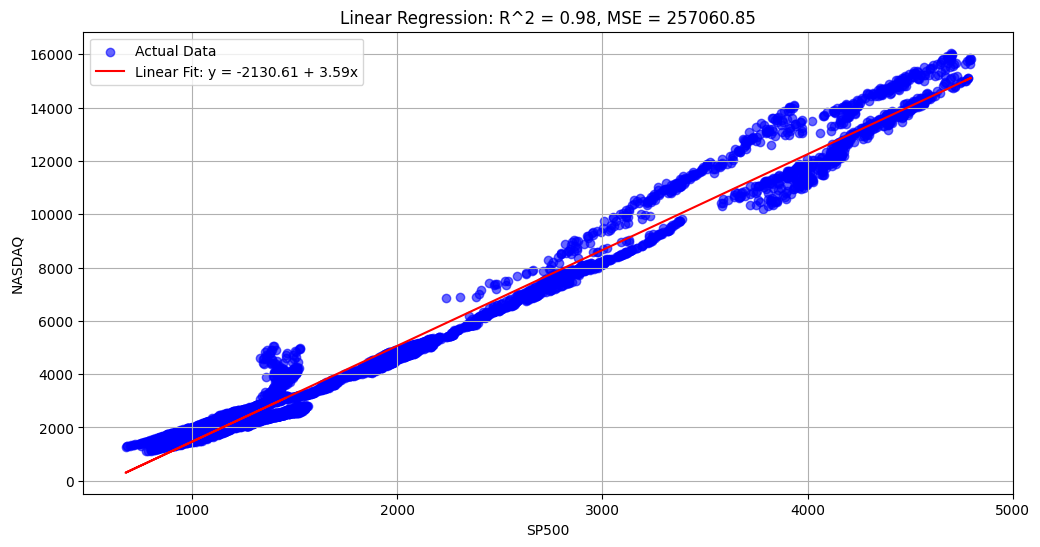

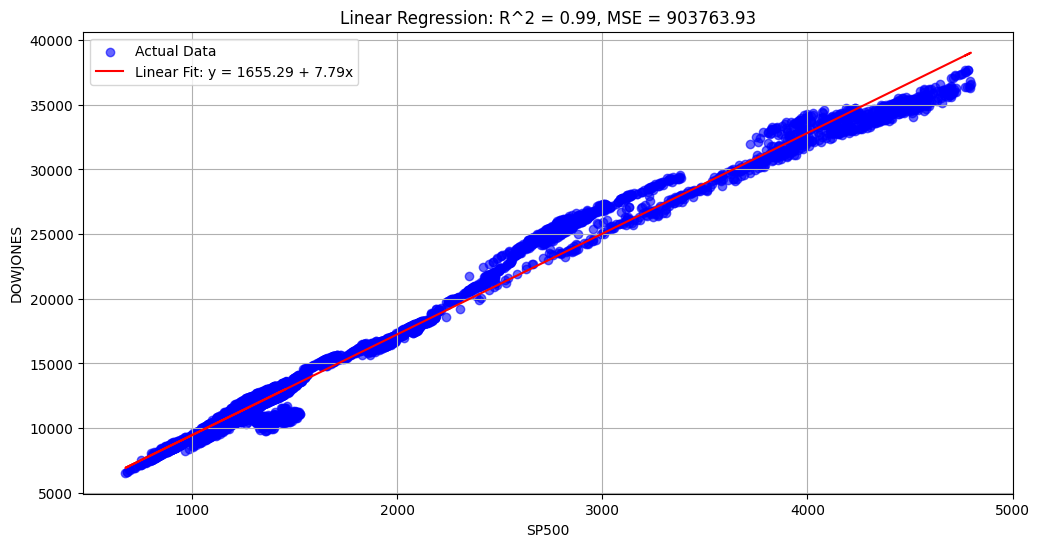

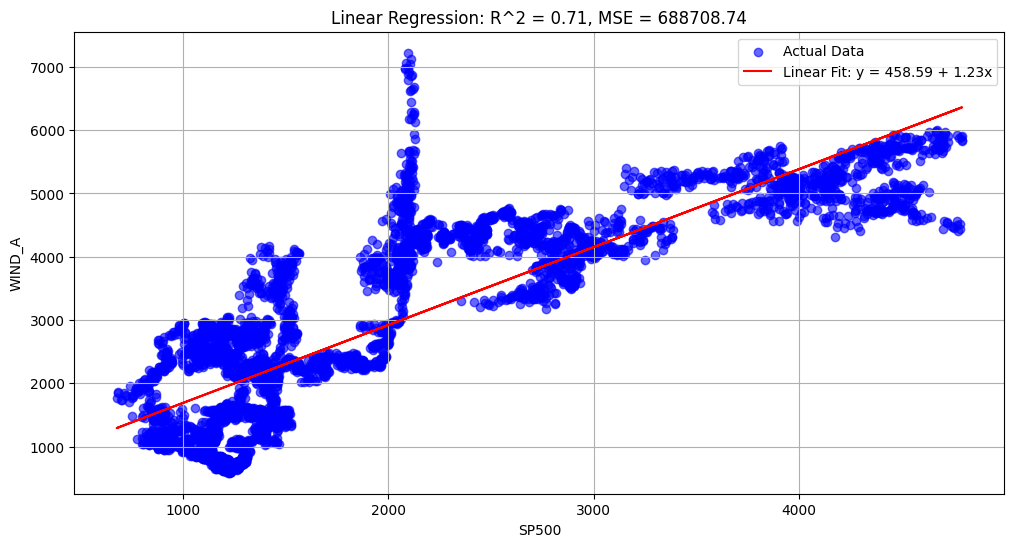

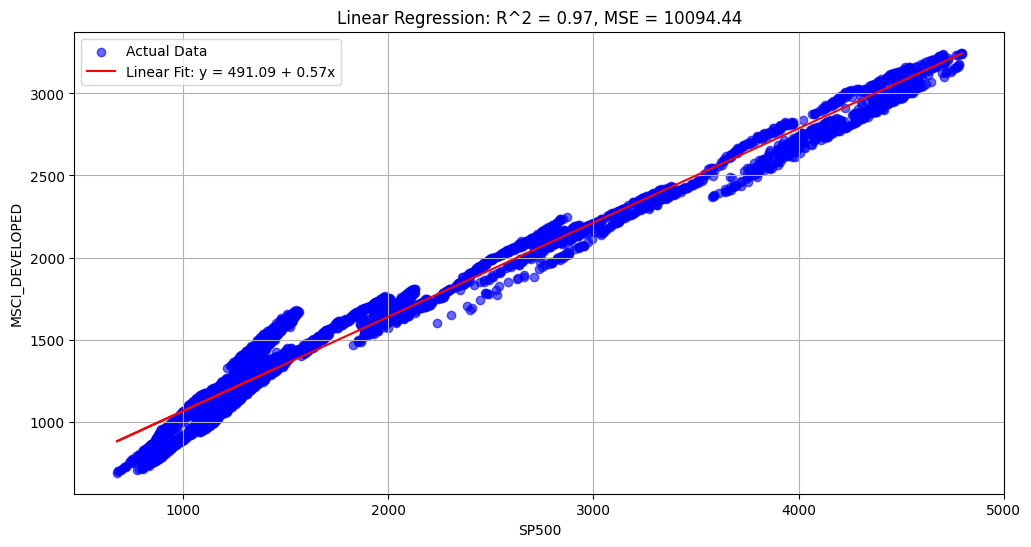

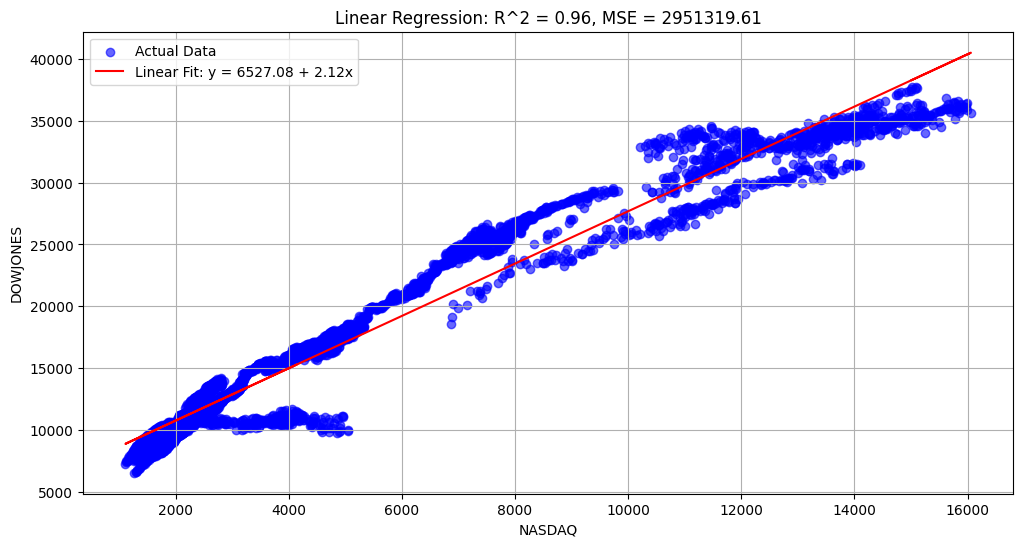

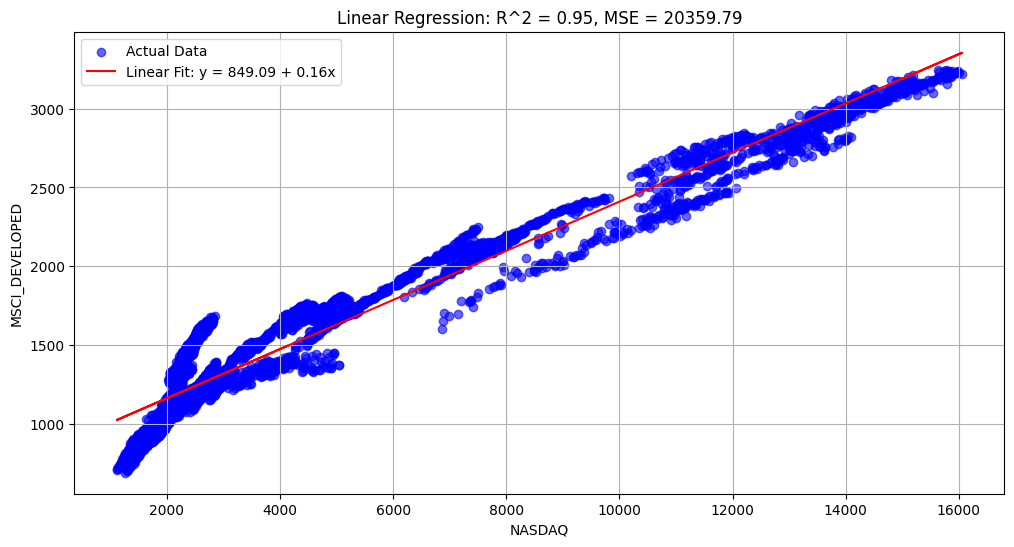

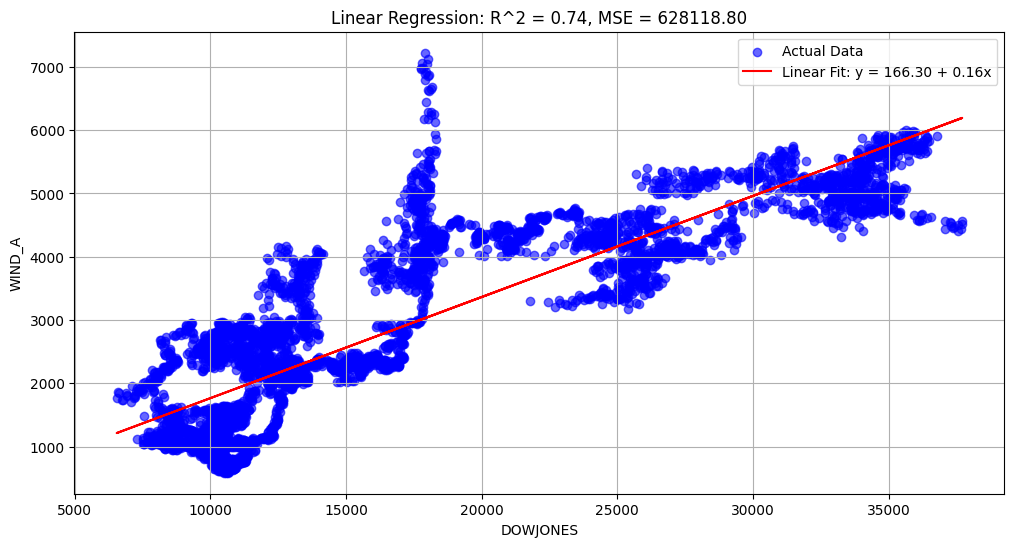

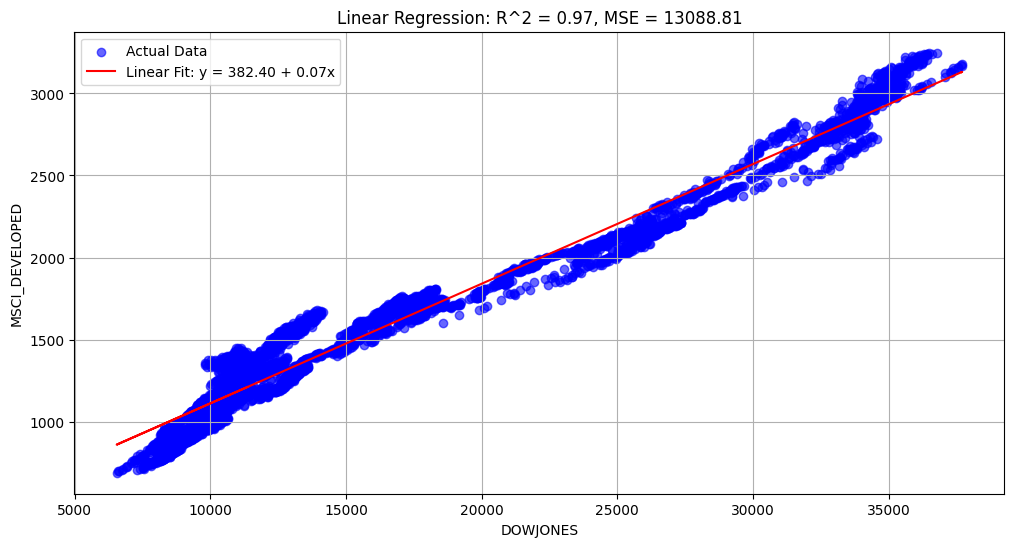

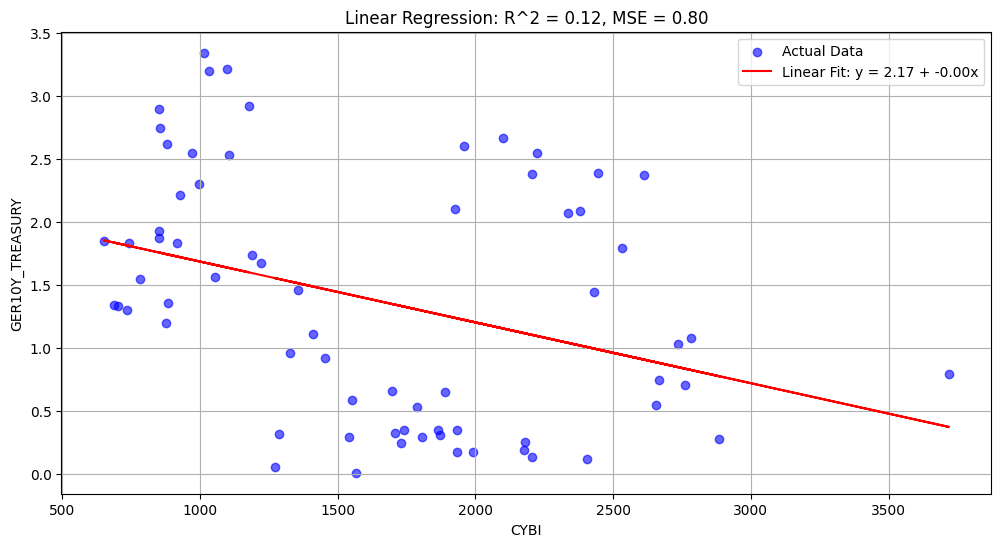

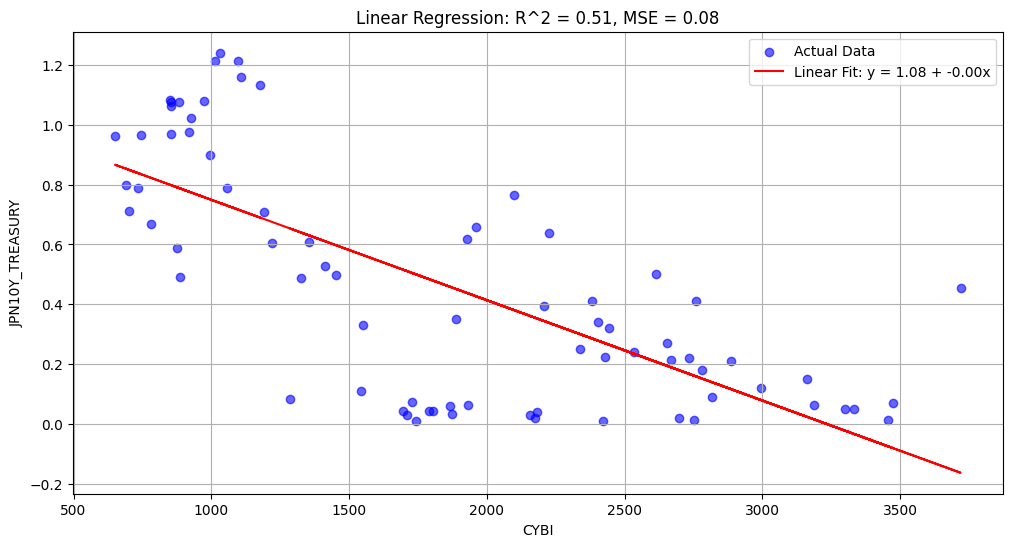

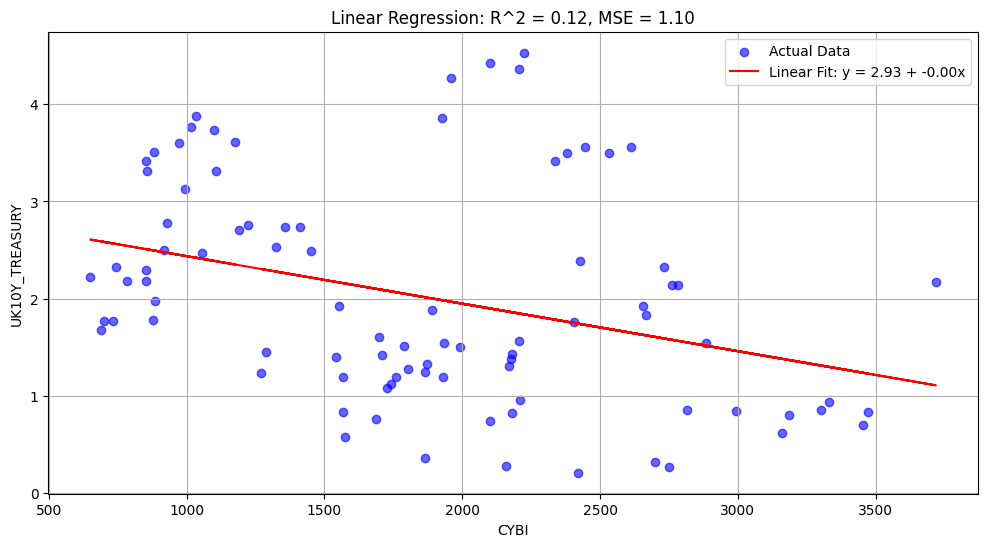

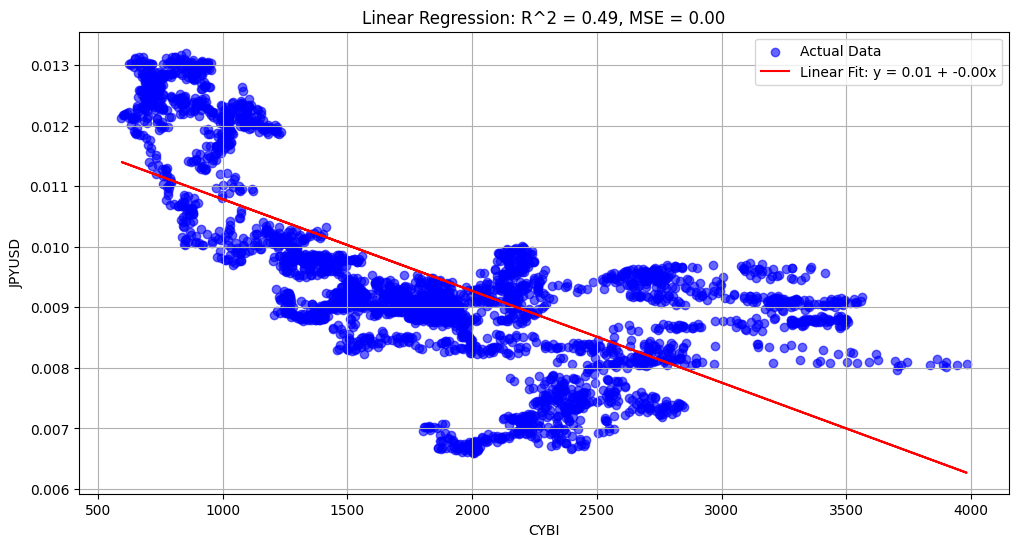

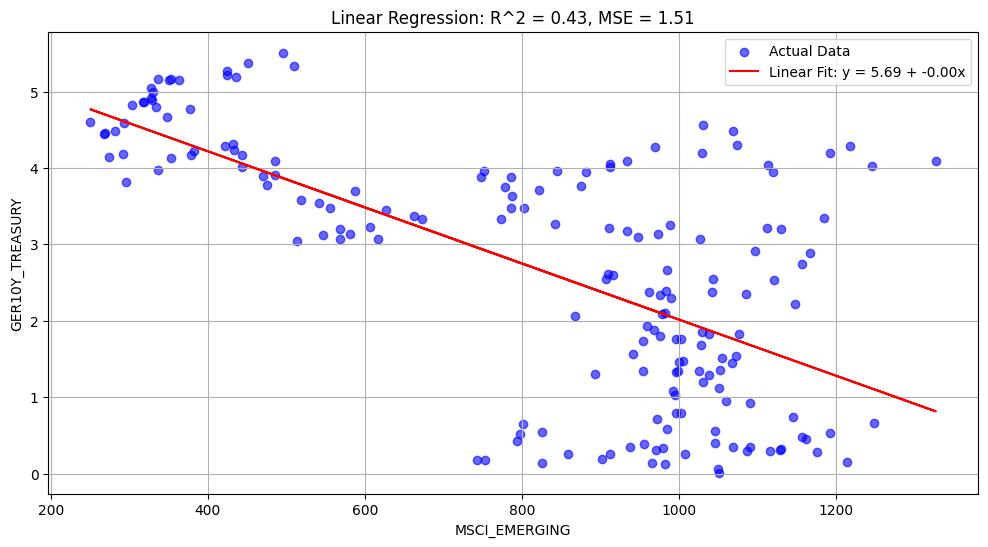

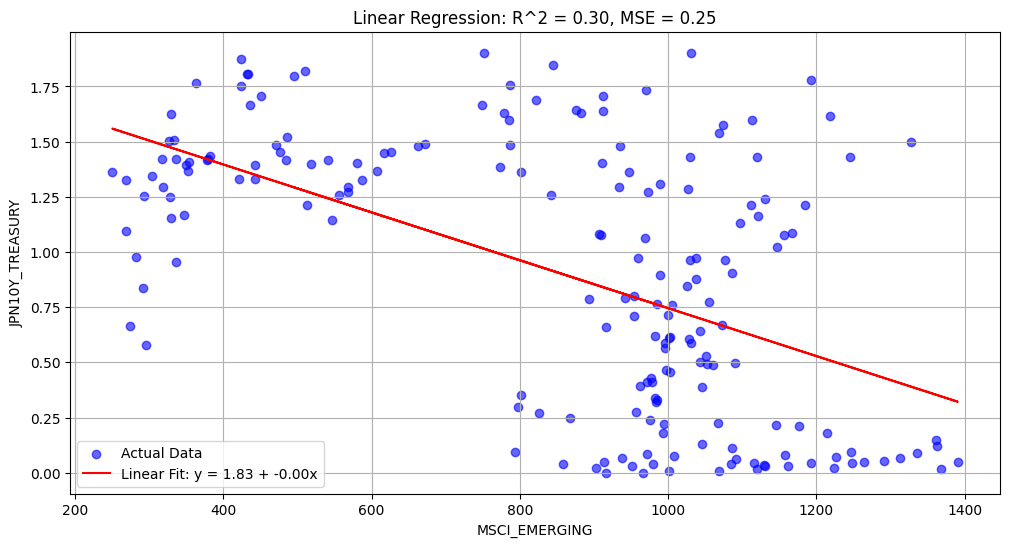

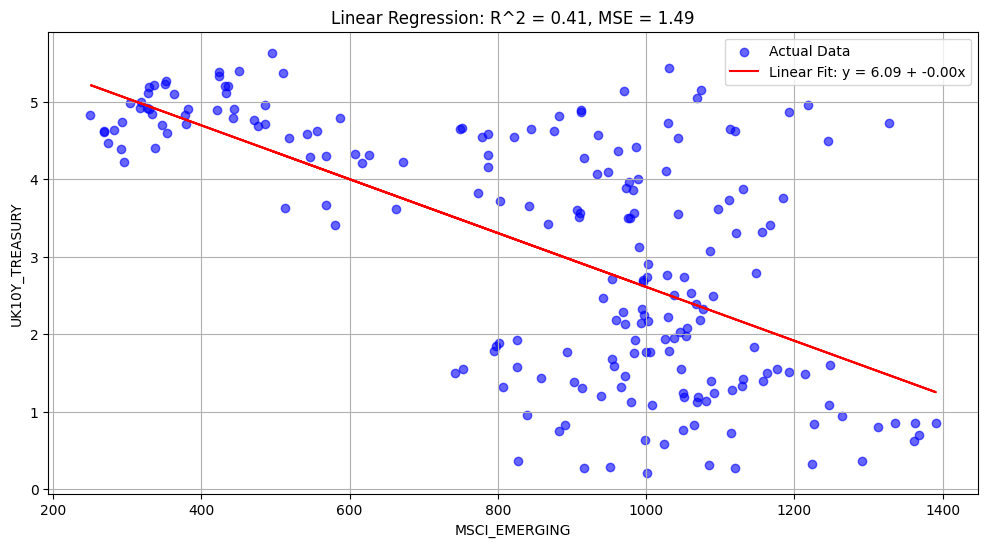

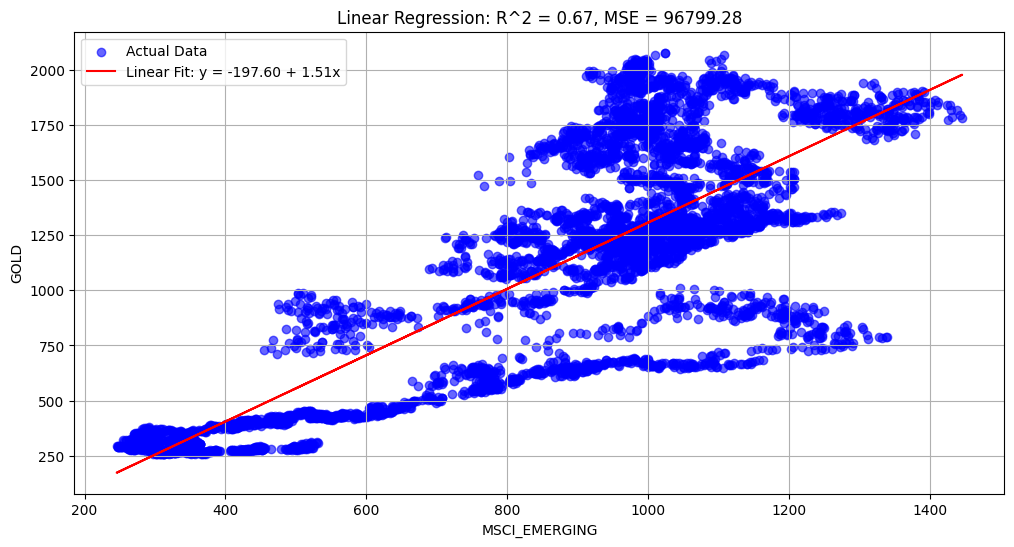

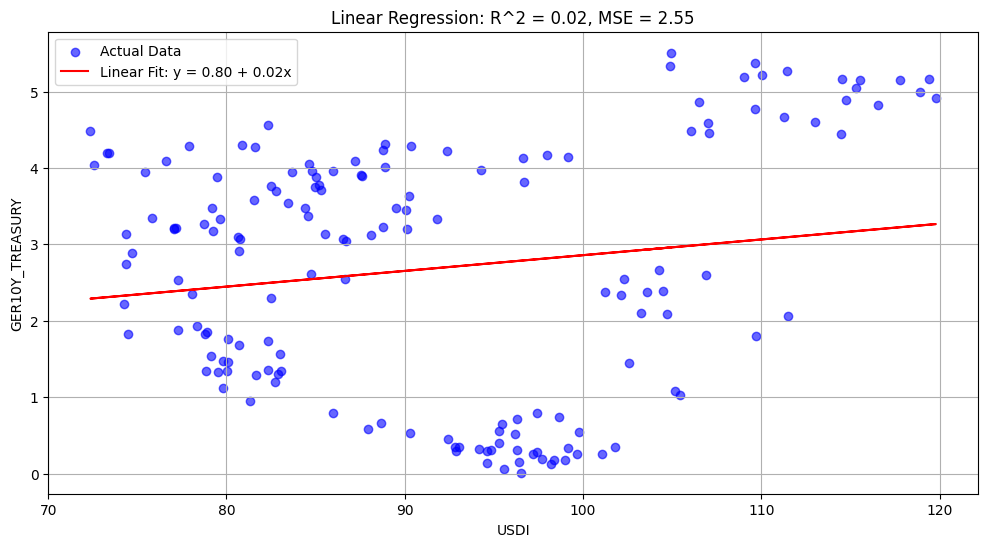

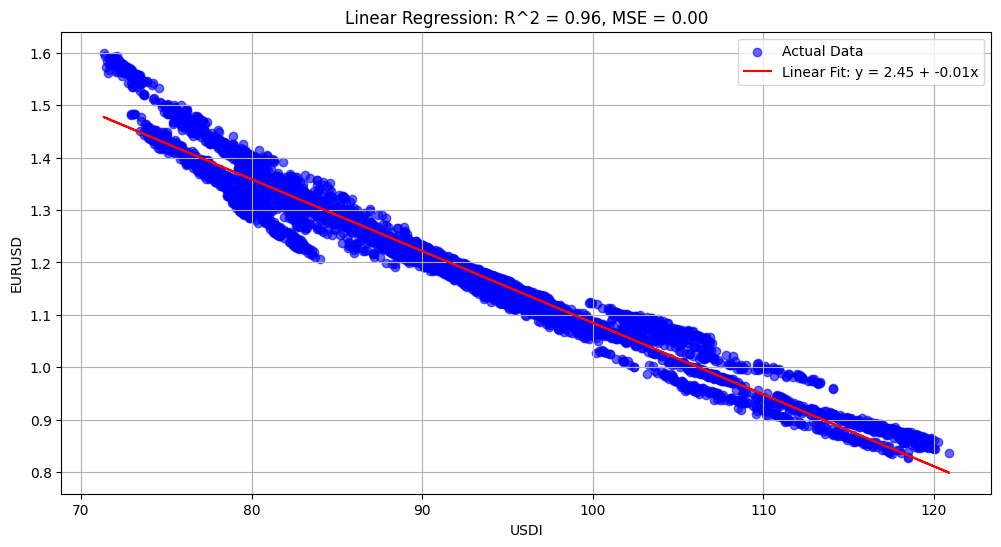

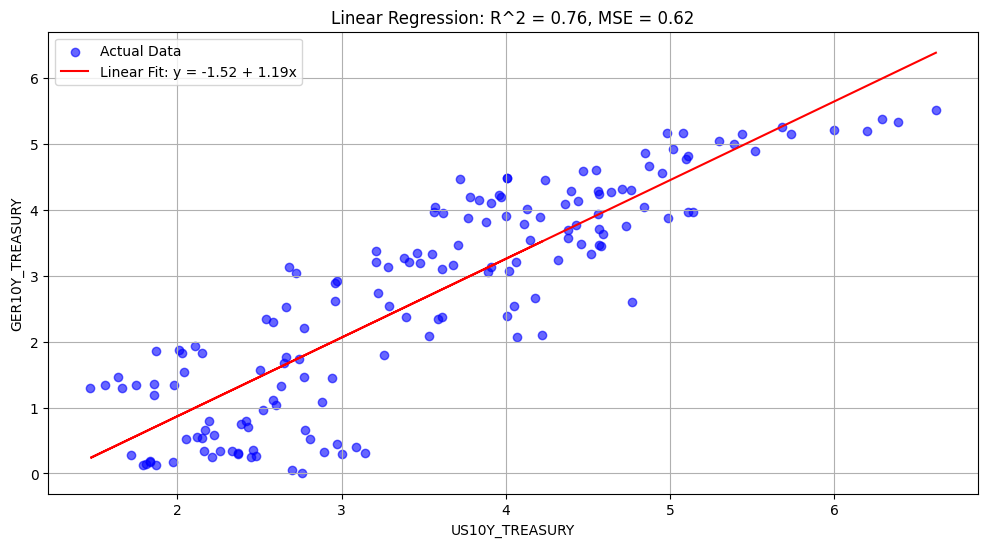

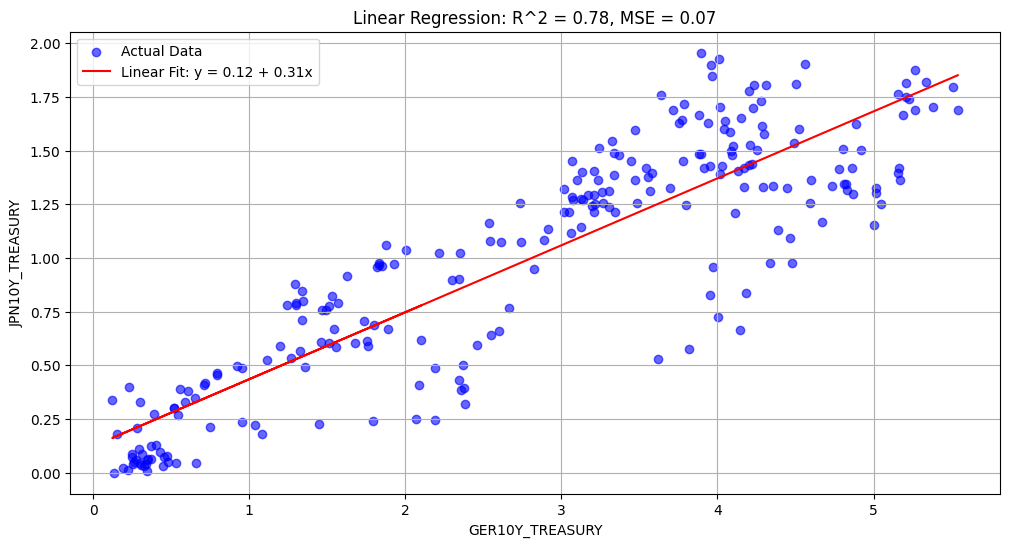

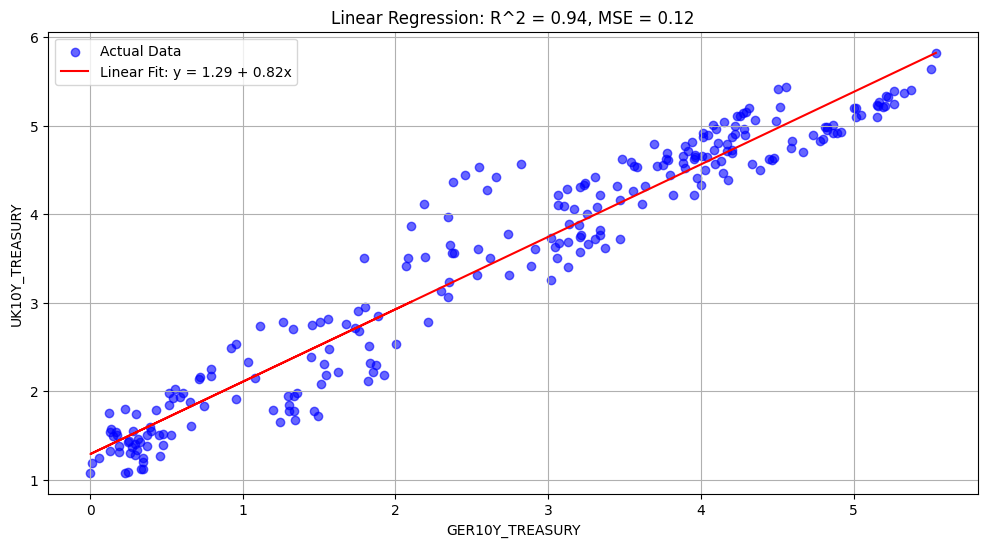

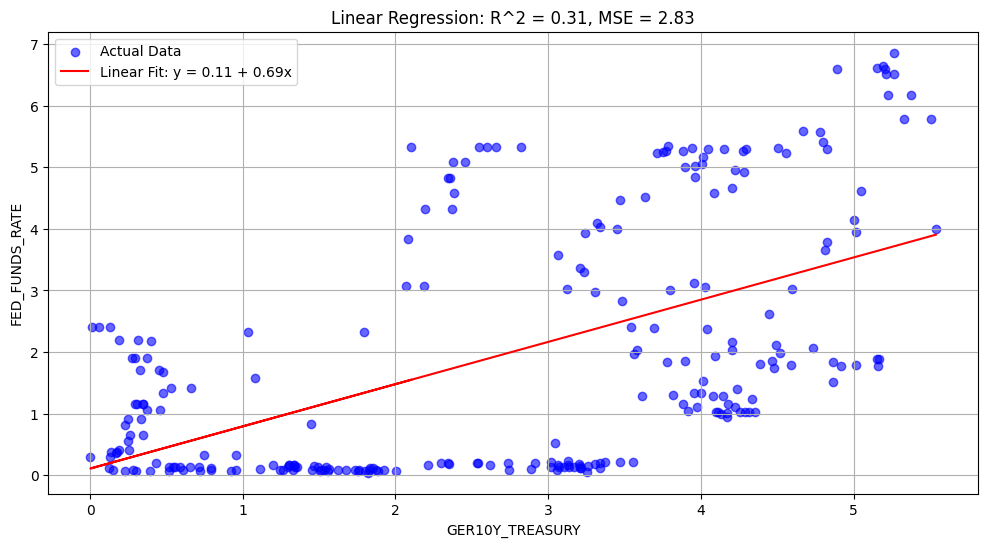

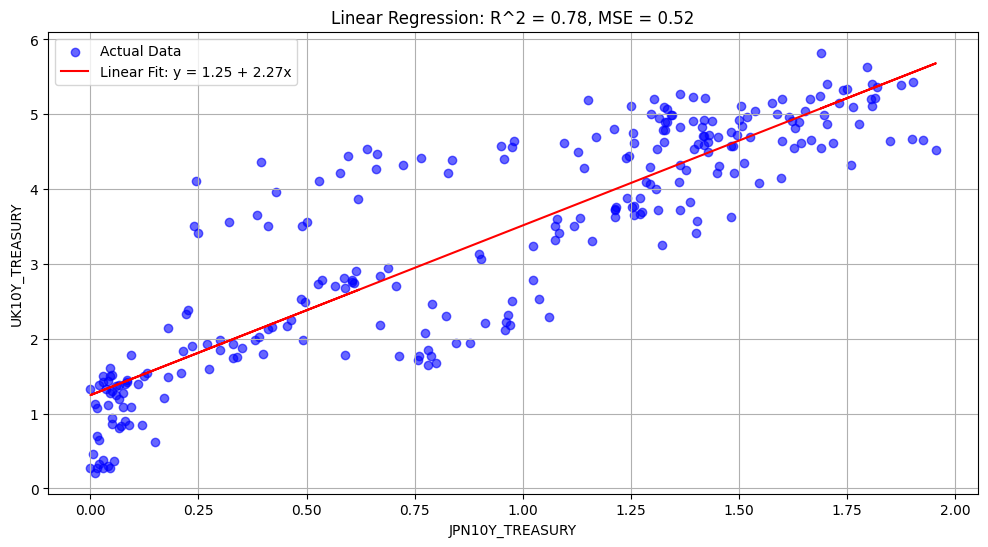

In [10]:
linear_regression_df = analyser.overall_linear_regression_analysis(plot=True) # plot=True to plot the regression

In [11]:
linear_regression_df

Model  \
S&P500|NASDAQ                                       Linear Regression   
S&P500|DOWJONES                                     Linear Regression   
S&P500|WIND A                                       Linear Regression   
S&P500|MSCI Developed Markets Index                 Linear Regression   
NASDAQ|DOWJONES                                     Linear Regression   
NASDAQ|MSCI Developed Markets Index                 Linear Regression   
DOWJONES|WIND A                                     Linear Regression   
DOWJONES|MSCI Developed Markets Index               Linear Regression   
ChiNext Index|German 10-Year Treasury Yield         Linear Regression   
ChiNext Index|Japanese 10-Year Treasury Yield       Linear Regression   
ChiNext Index|British 10-Year Treasury Yield        Linear Regression   
ChiNext Index|Japanese Yen to US Dollar             Linear Regression   
MSCI Emerging Markets Index|German 10-Year Trea...  Linear Regression   
MSCI Emerging Markets Index|Japanese 10-Year Tr...  Linear Regression   
MSCI Emerging Markets Index|British 10-Year Tre...  Linear Regression   
MSCI Emerging Markets Index|Gold Price              Linear Regression   
US Dollar Index|German 10-Year Treasury Yield       Linear Regression   
US Dollar Index|Euro to US Dollar                   Linear Regression   
American 10-Year Treasury Yield|German 10-Year ...  Linear Regression   
German 10-Year Treasury Yield|Japanese 10-Year ...  Linear Regression   
German 10-Year Treasury Yield|British 10-Year T...  Linear Regression   
German 10-Year Treasury Yield|Federal Funds Rate    Linear Regression   
Japanese 10-Year Treasury Yield|British 10-Year...  Linear Regression   

                                                         R^2   p-value  \
S&P500|NASDAQ                                       0.982646       0.0   
S&P500|DOWJONES                                      0.98695       0.0   
S&P500|WIND A                                       0.713024       0.0   
S&P500|MSCI Developed Markets Index                  0.97351       0.0   
NASDAQ|DOWJONES                                     0.957385       0.0   
NASDAQ|MSCI Developed Markets Index                 0.946572       0.0   
DOWJONES|WIND A                                     0.738271       0.0   
DOWJONES|MSCI Developed Markets Index               0.965652       0.0   
ChiNext Index|German 10-Year Treasury Yield         0.123114   0.00335   
ChiNext Index|Japanese 10-Year Treasury Yield       0.509191       0.0   
ChiNext Index|British 10-Year Treasury Yield        0.115378  0.001128   
ChiNext Index|Japanese Yen to US Dollar             0.487297       0.0   
MSCI Emerging Markets Index|German 10-Year Trea...  0.428919       0.0   
MSCI Emerging Markets Index|Japanese 10-Year Tr...  0.304492       0.0   
MSCI Emerging Markets Index|British 10-Year Tre...  0.413762       0.0   
MSCI Emerging Markets Index|Gold Price              0.669076       0.0   
US Dollar Index|German 10-Year Treasury Yield       0.023964  0.049905   
US Dollar Index|Euro to US Dollar                   0.961423       0.0   
American 10-Year Treasury Yield|German 10-Year ...  0.763241       0.0   
German 10-Year Treasury Yield|Japanese 10-Year ...  0.783424       0.0   
German 10-Year Treasury Yield|British 10-Year T...  0.935006       0.0   
German 10-Year Treasury Yield|Federal Funds Rate    0.306058       0.0   
Japanese 10-Year Treasury Yield|British 10-Year...  0.778098       0.0   

                                                       t-value  
S&P500|NASDAQ                                       584.563556  
S&P500|DOWJONES                                     675.594263  
S&P500|WIND A                                       118.156963  
S&P500|MSCI Developed Markets Index                 470.903986  
NASDAQ|DOWJONES                                     368.214608  
NASDAQ|MSCI Developed Markets Index                 326.959134  
DOWJONES|WIND A                                     125.896032  
DOWJONES|MSCI 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.104e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -45549.
No. Observations:                6037   AIC:                         9.110e+04
Df Residuals:                    6034   BIC:                         9.112e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1038.9862     31.980    -32.489      0.0

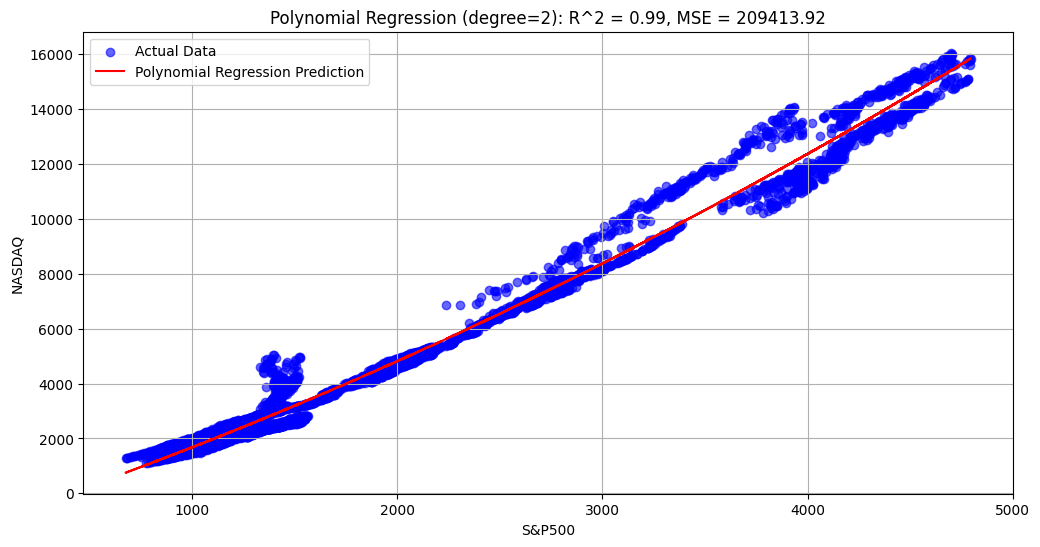

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.447e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -48731.
No. Observations:                6037   AIC:                         9.747e+04
Df Residuals:                    6034   BIC:                         9.749e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1097.1054     54.170    -20.253      0.0

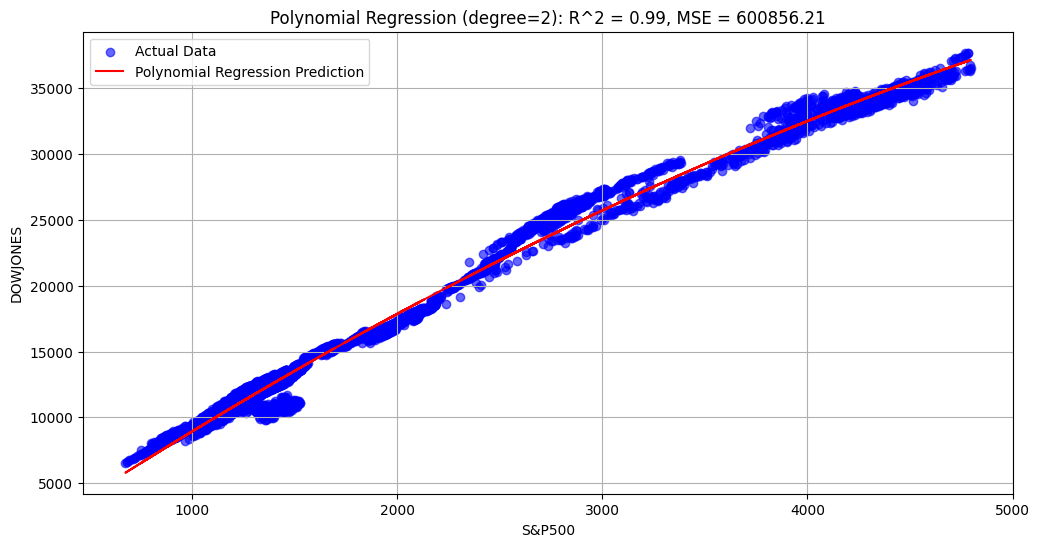

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     9235.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -45173.
No. Observations:                5621   AIC:                         9.035e+04
Df Residuals:                    5618   BIC:                         9.037e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1332.8408     54.066    -24.652      0.0

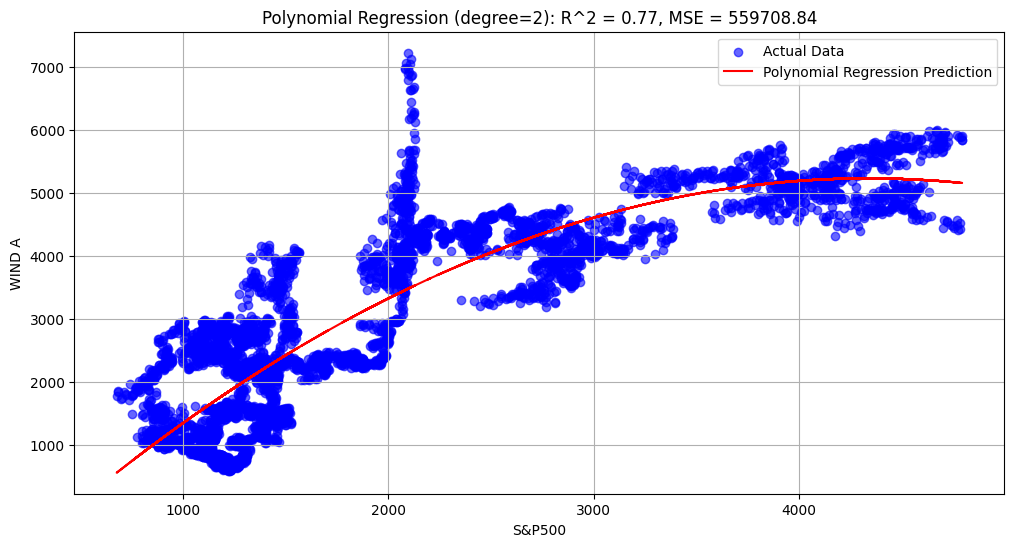

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.303e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -35914.
No. Observations:                6036   AIC:                         7.183e+04
Df Residuals:                    6033   BIC:                         7.185e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        299.0989      6.489     46.094      0.0

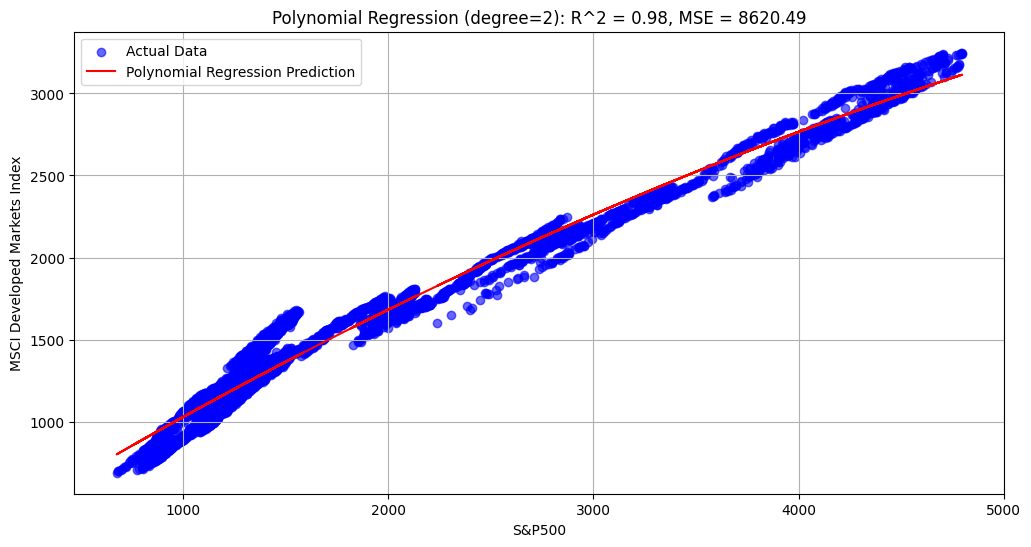

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.094e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -52139.
No. Observations:                6037   AIC:                         1.043e+05
Df Residuals:                    6034   BIC:                         1.043e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3856.6901     53.192     72.506      0.0

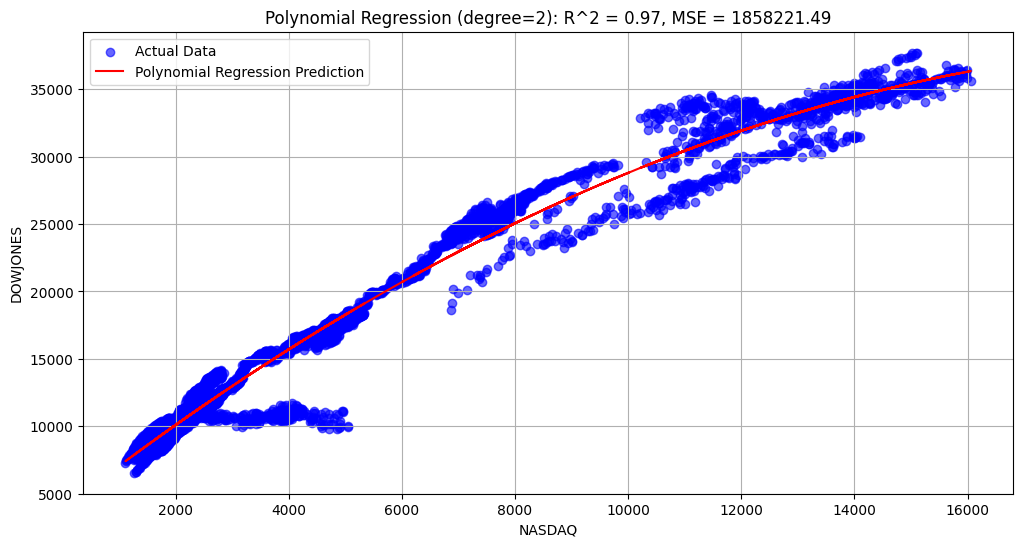

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 6.515e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:24   Log-Likelihood:                -37938.
No. Observations:                6036   AIC:                         7.588e+04
Df Residuals:                    6033   BIC:                         7.590e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.0405      5.067    137.759      0.0

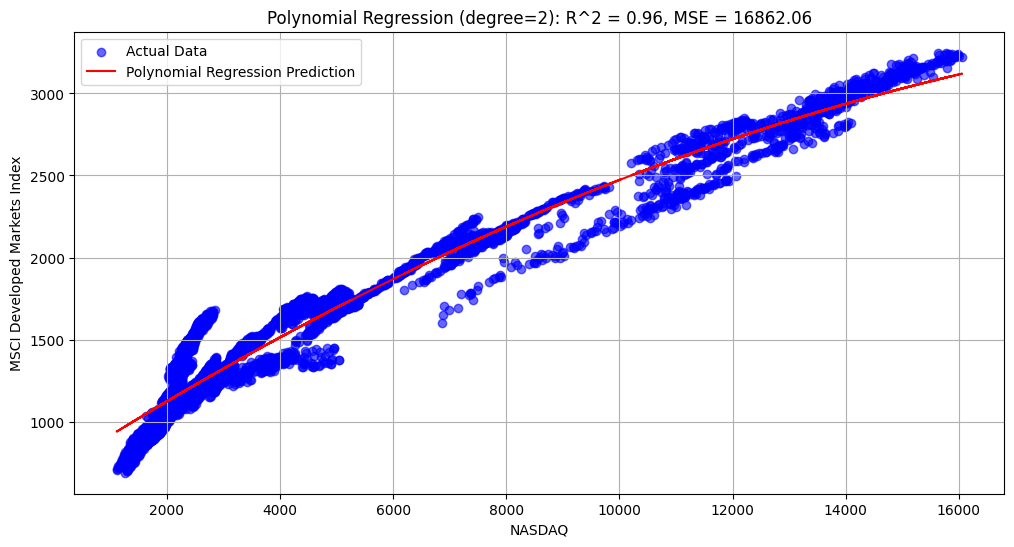

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:25   Log-Likelihood:                -44976.
No. Observations:                5621   AIC:                         8.996e+04
Df Residuals:                    5618   BIC:                         8.998e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1883.9360     64.463    -29.225      0.0

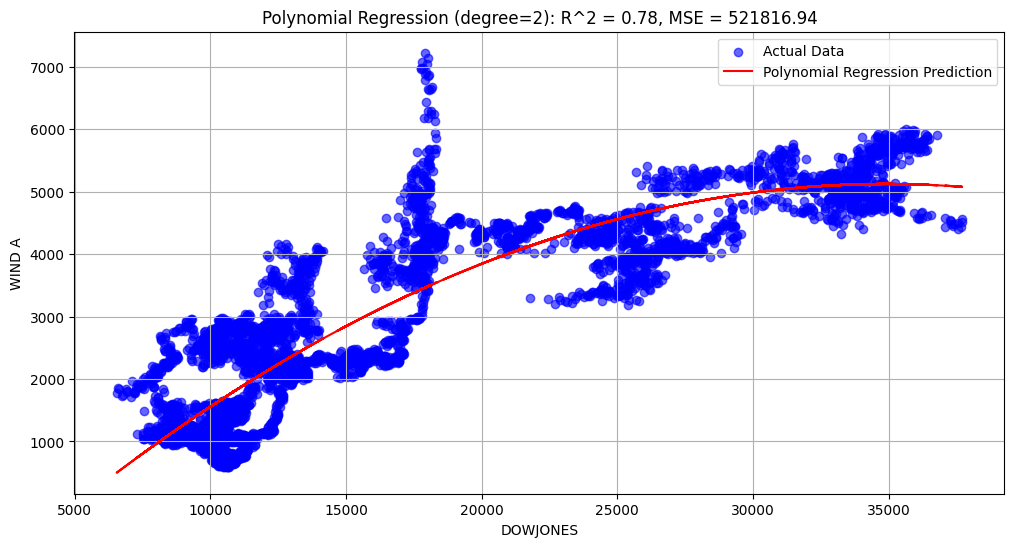

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 8.484e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:25   Log-Likelihood:                -37173.
No. Observations:                6036   AIC:                         7.435e+04
Df Residuals:                    6033   BIC:                         7.437e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.6091      9.868     37.253      0.0

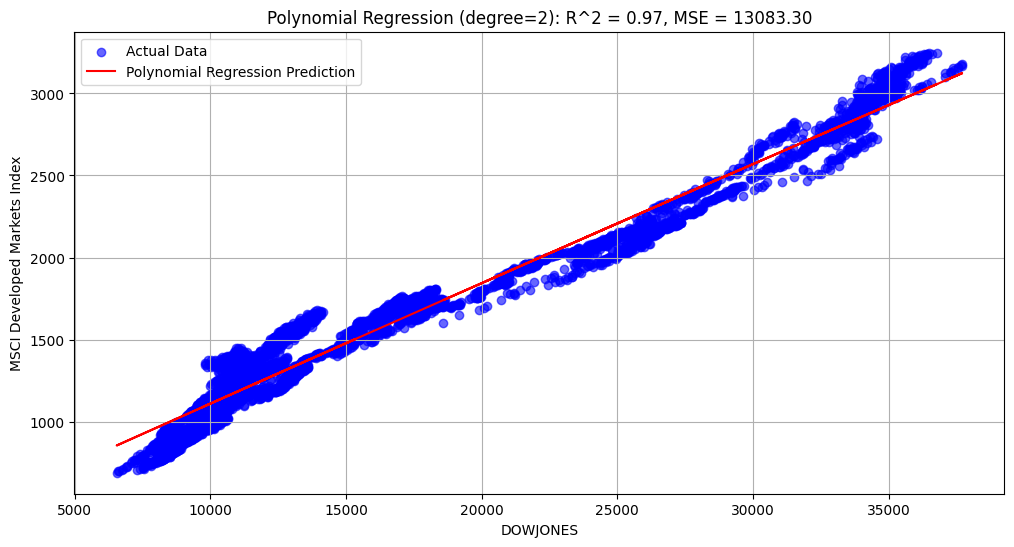

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     6.535
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00259
Time:                        22:14:25   Log-Likelihood:                -87.201
No. Observations:                  68   AIC:                             180.4
Df Residuals:                      65   BIC:                             187.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1805      0.612      5.200      0.0

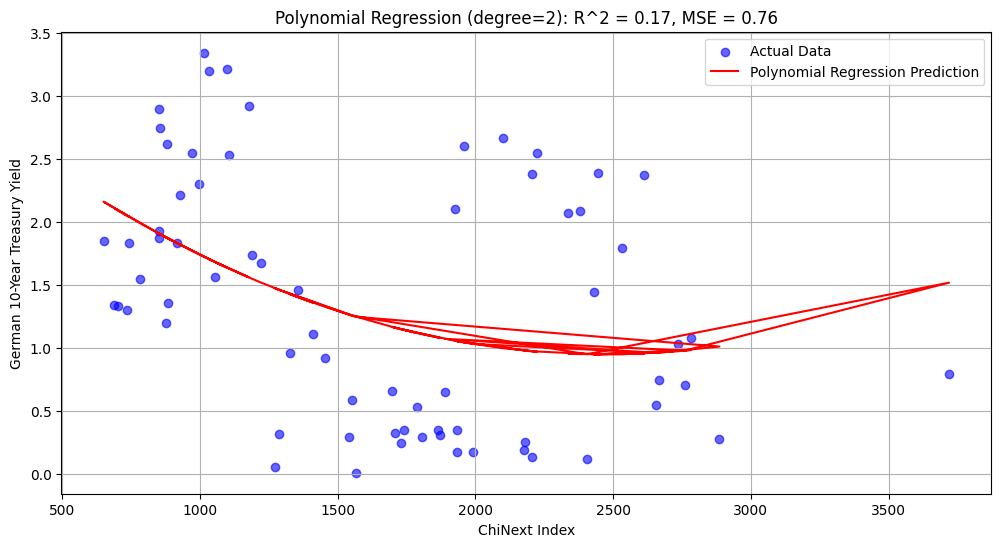

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     56.37
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.85e-15
Time:                        22:14:25   Log-Likelihood:               -0.95055
No. Observations:                  75   AIC:                             7.901
Df Residuals:                      72   BIC:                             14.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6964      0.158     10.738      0.0

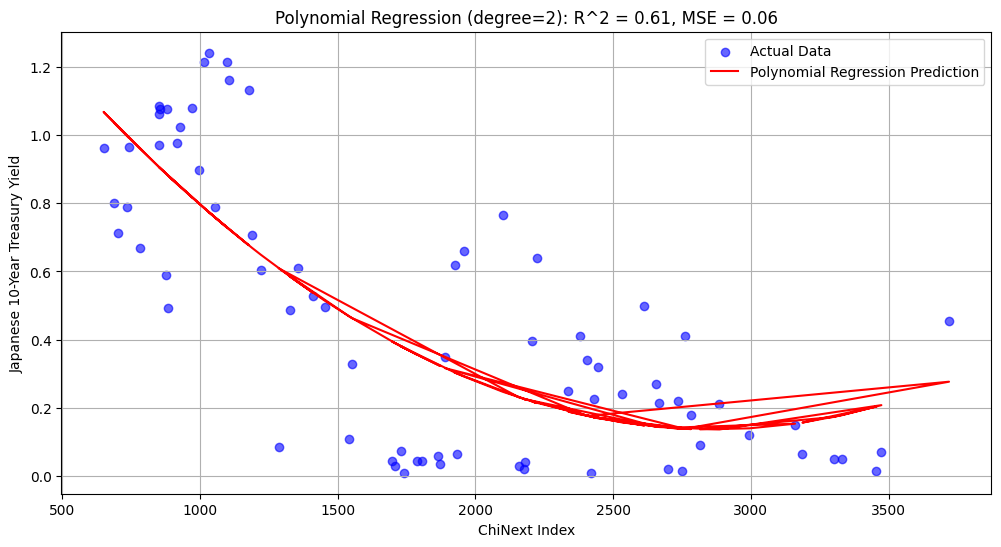

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.612
Date:                Thu, 28 Nov 2024   Prob (F-statistic):            0.00512
Time:                        22:14:25   Log-Likelihood:                -130.50
No. Observations:                  89   AIC:                             267.0
Df Residuals:                      86   BIC:                             274.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9710      0.648      4.586      0.0

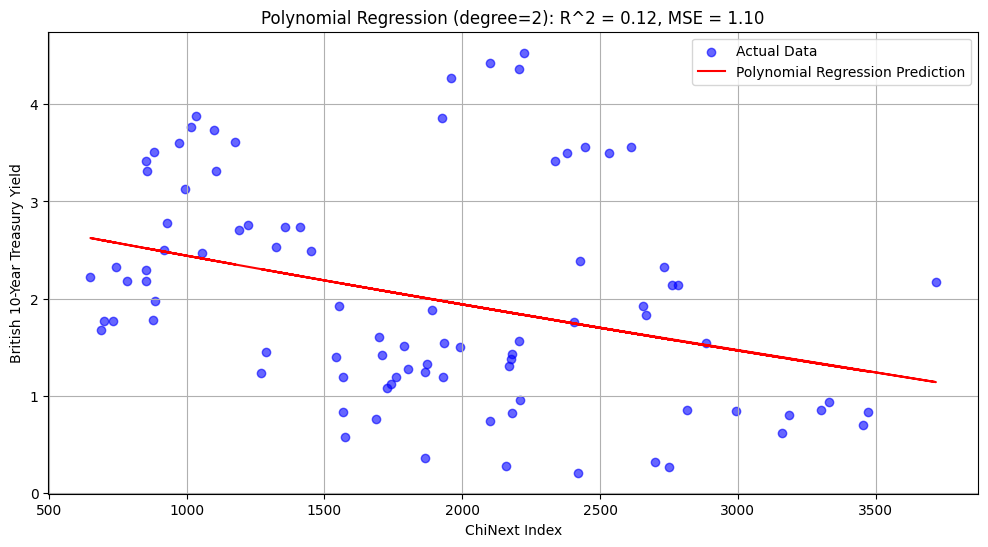

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     4787.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:25   Log-Likelihood:                 18771.
No. Observations:                3297   AIC:                        -3.754e+04
Df Residuals:                    3294   BIC:                        -3.752e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165    8.3e-05    199.442      0.0

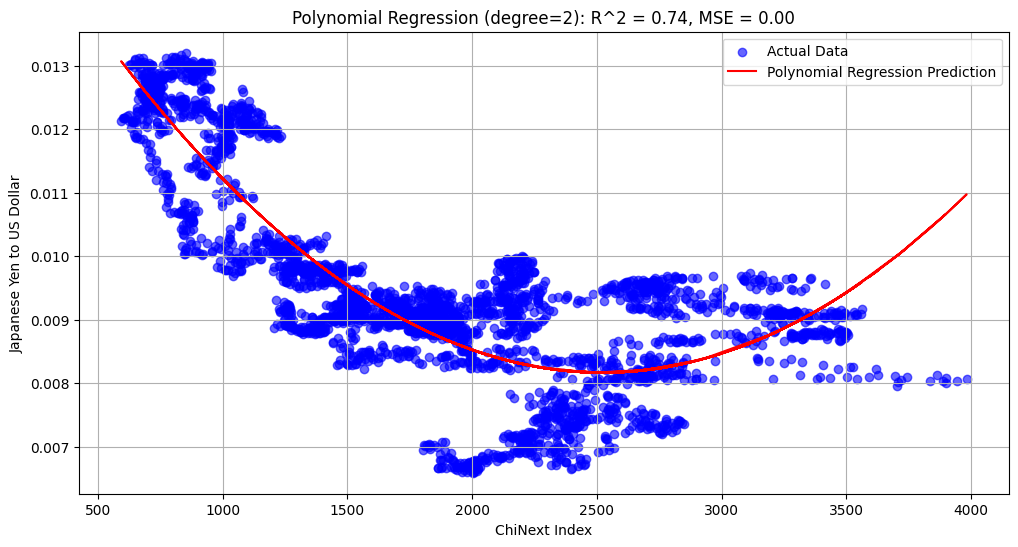

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     74.70
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.81e-24
Time:                        22:14:25   Log-Likelihood:                -282.34
No. Observations:                 177   AIC:                             570.7
Df Residuals:                     174   BIC:                             580.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6606      0.662     11.572      0.0

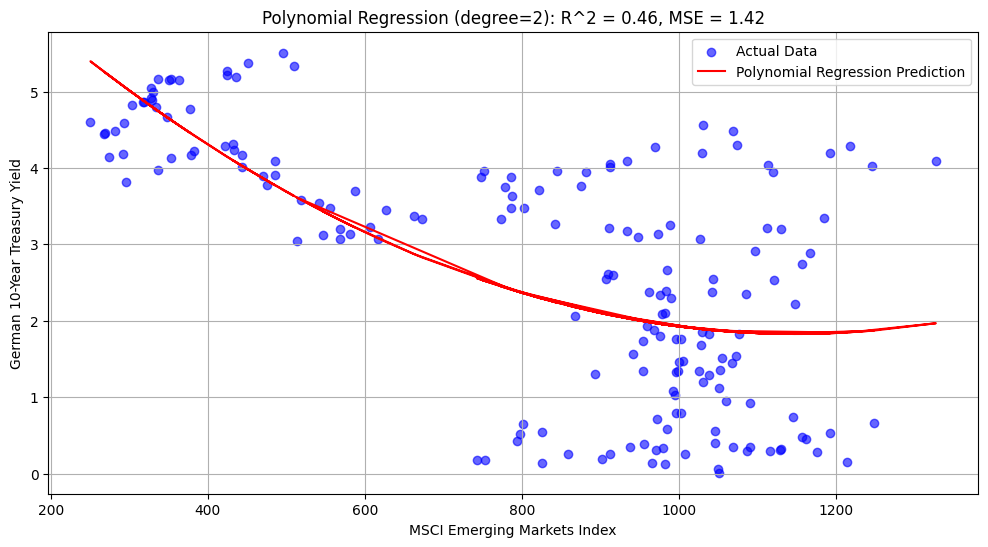

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     43.42
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.46e-16
Time:                        22:14:25   Log-Likelihood:                -134.38
No. Observations:                 188   AIC:                             274.8
Df Residuals:                     185   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4022      0.238      5.886      0.0

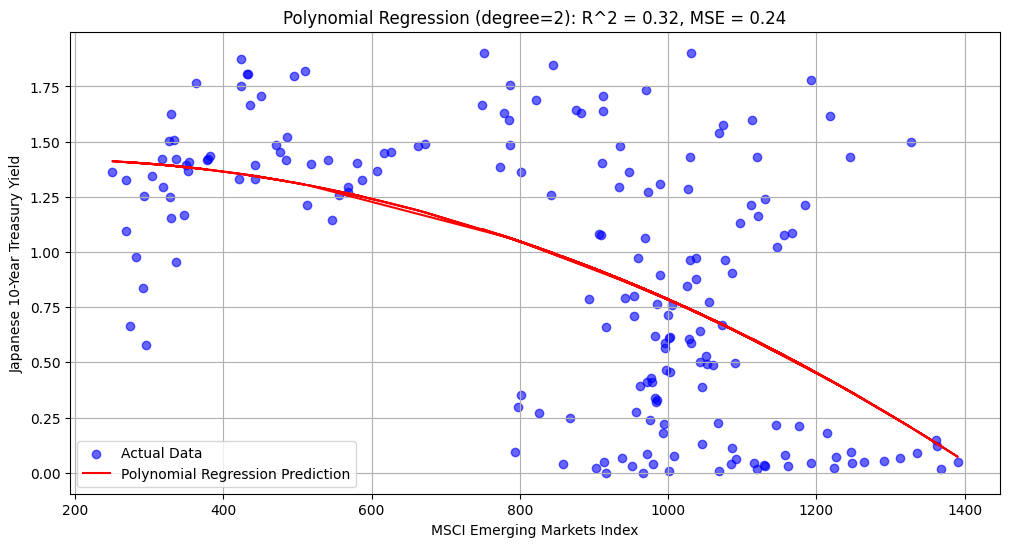

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     71.43
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.46e-24
Time:                        22:14:25   Log-Likelihood:                -332.01
No. Observations:                 205   AIC:                             670.0
Df Residuals:                     202   BIC:                             680.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2998      0.580     10.869      0.0

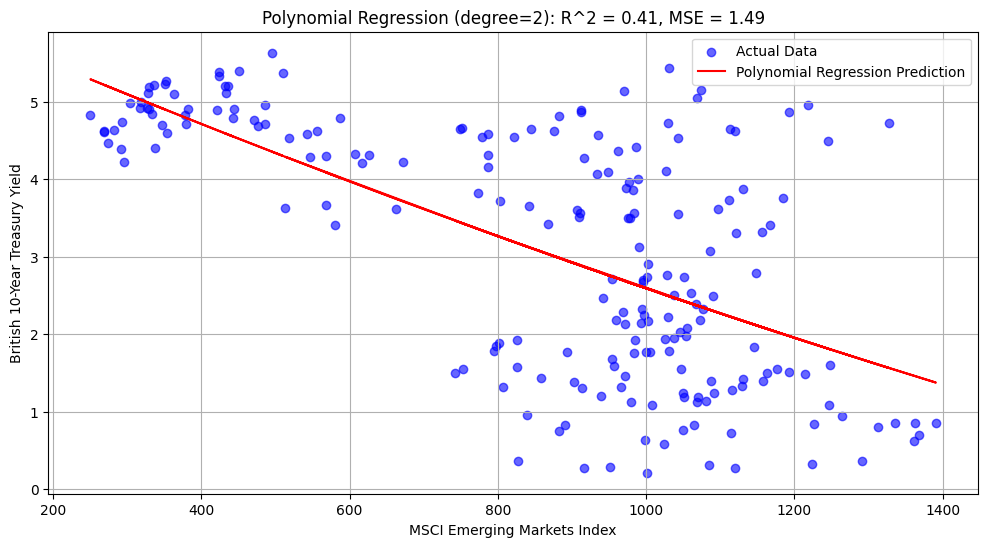

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     6509.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:25   Log-Likelihood:                -44748.
No. Observations:                6259   AIC:                         8.950e+04
Df Residuals:                    6256   BIC:                         8.952e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -457.7488     26.377    -17.354      0.0

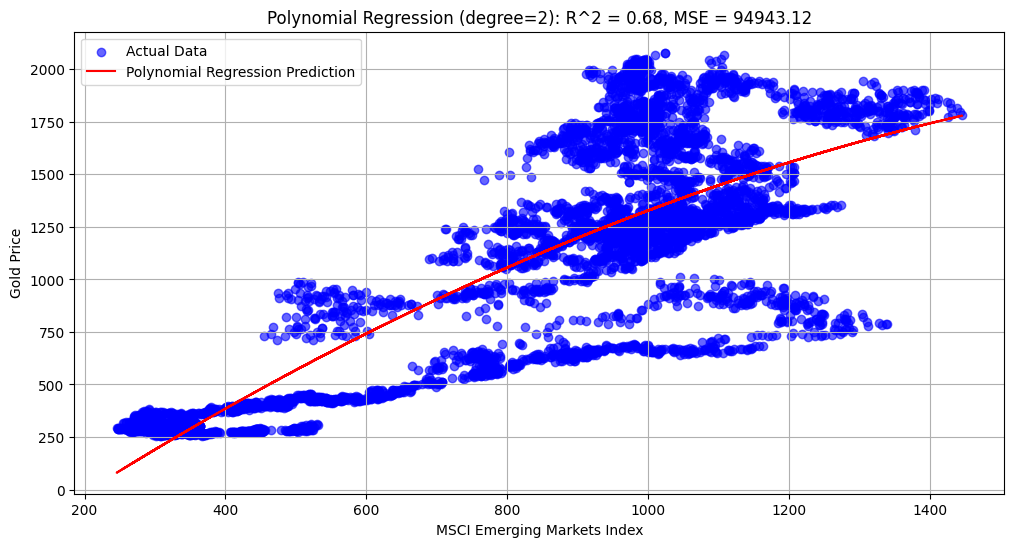

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     28.15
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.50e-11
Time:                        22:14:26   Log-Likelihood:                -281.32
No. Observations:                 161   AIC:                             568.6
Df Residuals:                     158   BIC:                             577.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.2653      6.550      7.216      0.0

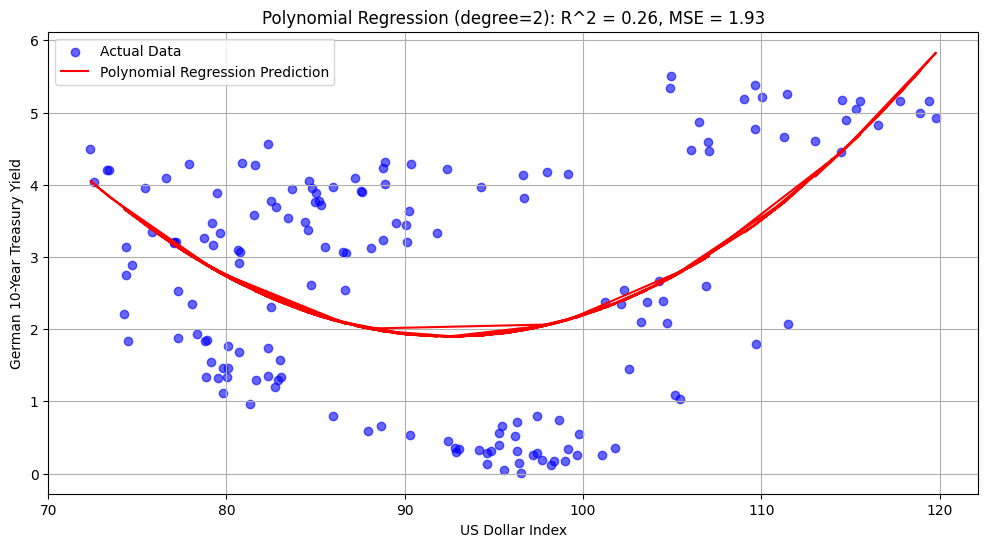

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 9.119e+04
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:26   Log-Likelihood:                 12990.
No. Observations:                6064   AIC:                        -2.597e+04
Df Residuals:                    6061   BIC:                        -2.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2180      0.022    144.883      0.0

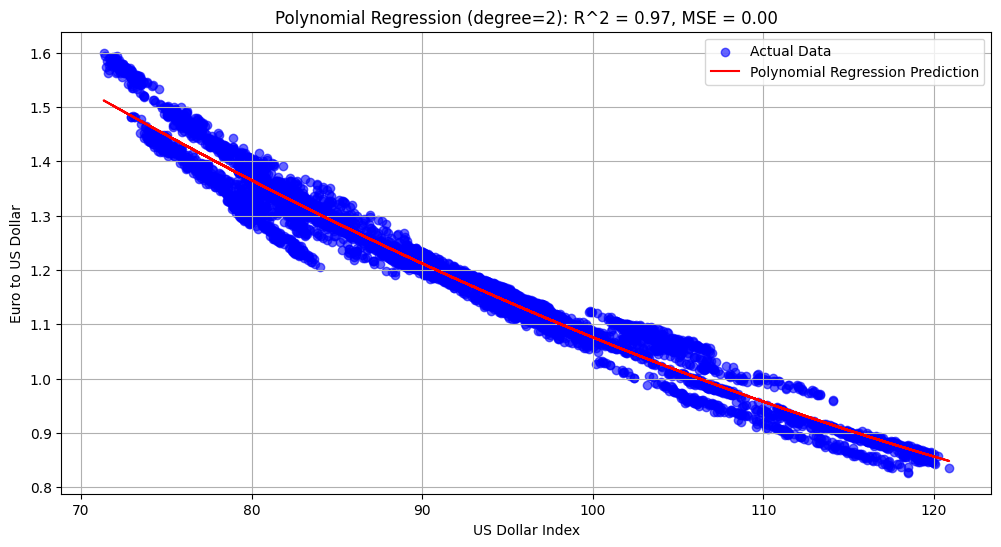

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     257.9
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.45e-50
Time:                        22:14:26   Log-Likelihood:                -187.61
No. Observations:                 160   AIC:                             381.2
Df Residuals:                     157   BIC:                             390.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2625      0.528     -4.282      0.0

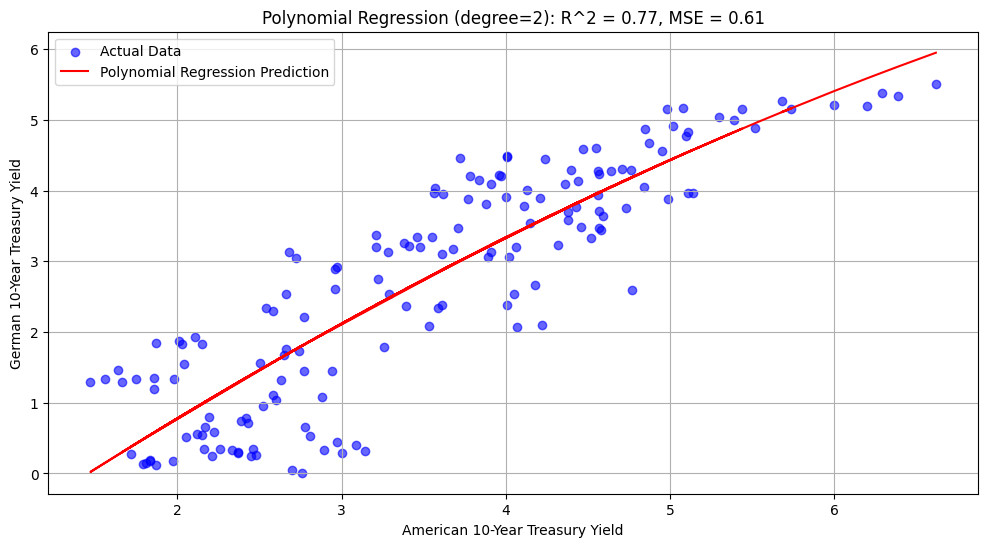

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     492.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.73e-85
Time:                        22:14:26   Log-Likelihood:                -4.8501
No. Observations:                 242   AIC:                             15.70
Df Residuals:                     239   BIC:                             26.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0427      0.046     -0.932      0.3

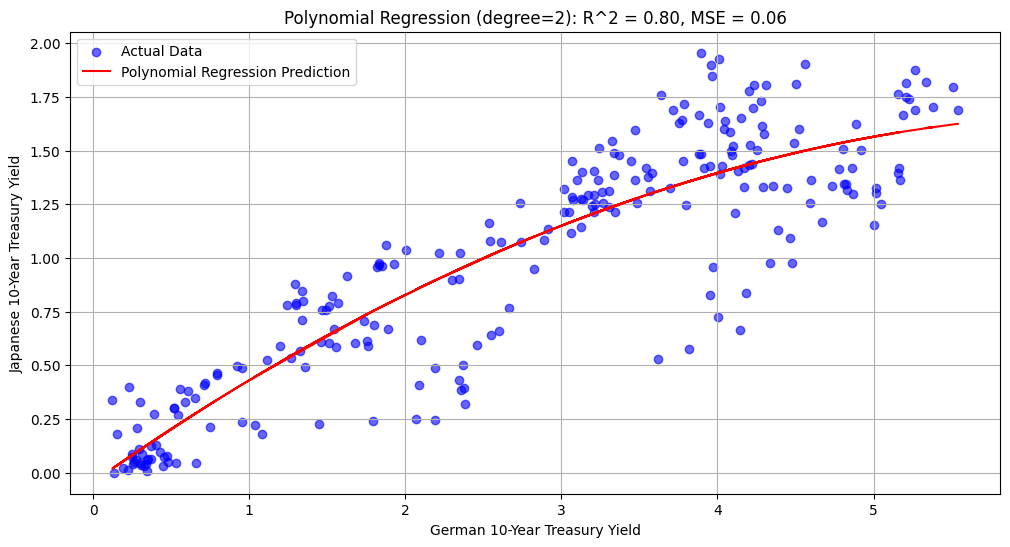

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1949.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.54e-152
Time:                        22:14:26   Log-Likelihood:                -82.533
No. Observations:                 250   AIC:                             171.1
Df Residuals:                     247   BIC:                             181.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1070      0.056     19.657      0.0

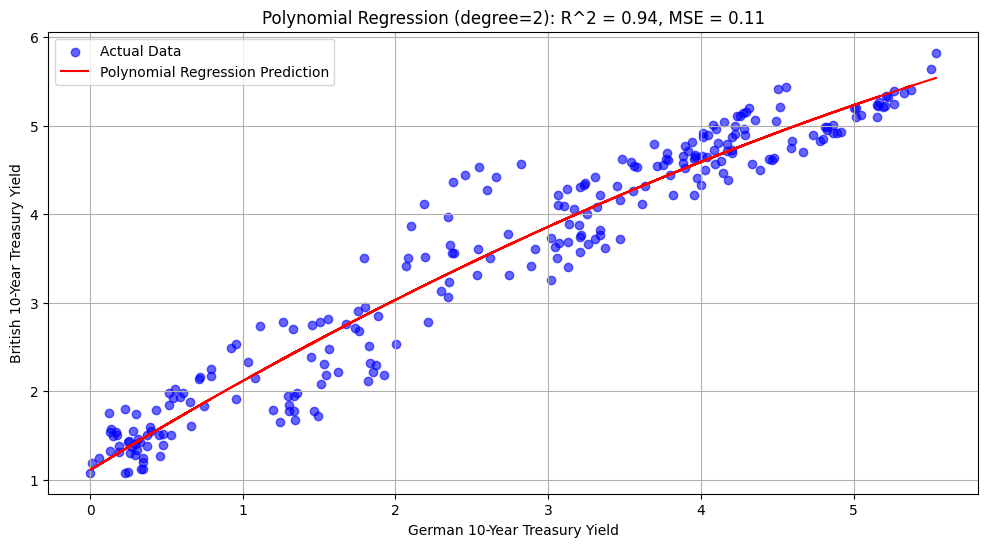

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     67.83
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           3.31e-24
Time:                        22:14:26   Log-Likelihood:                -475.67
No. Observations:                 250   AIC:                             957.3
Df Residuals:                     247   BIC:                             967.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9014      0.271      3.322      0.0

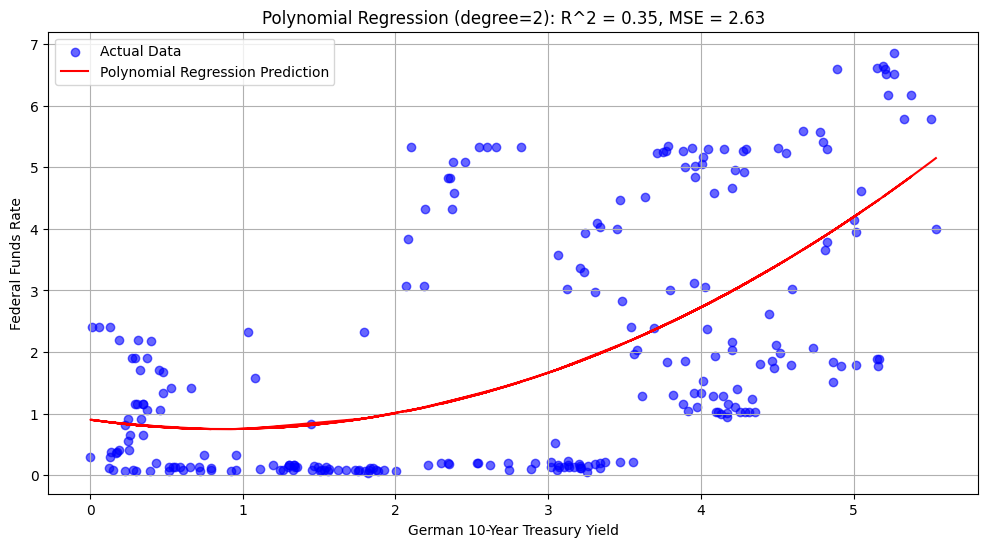

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     481.9
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.41e-88
Time:                        22:14:26   Log-Likelihood:                -282.19
No. Observations:                 264   AIC:                             570.4
Df Residuals:                     261   BIC:                             581.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0417      0.101     10.271      0.0

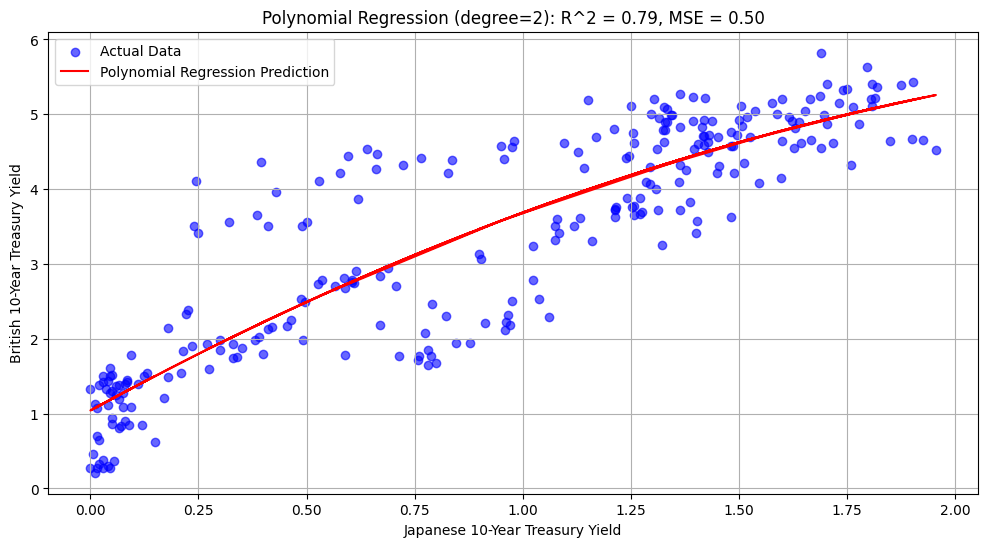

In [12]:
polynomial_regression_df = analyser.overall_polynomial_regression_analysis(plot=True) # plot=True to plot the regression

In [13]:
polynomial_regression_df

Model  \
S&P500|NASDAQ                                       Polynomial Regression   
S&P500|DOWJONES                                     Polynomial Regression   
S&P500|WIND A                                       Polynomial Regression   
S&P500|MSCI Developed Markets Index                 Polynomial Regression   
NASDAQ|DOWJONES                                     Polynomial Regression   
NASDAQ|MSCI Developed Markets Index                 Polynomial Regression   
DOWJONES|WIND A                                     Polynomial Regression   
DOWJONES|MSCI Developed Markets Index               Polynomial Regression   
ChiNext Index|German 10-Year Treasury Yield         Polynomial Regression   
ChiNext Index|Japanese 10-Year Treasury Yield       Polynomial Regression   
ChiNext Index|British 10-Year Treasury Yield        Polynomial Regression   
ChiNext Index|Japanese Yen to US Dollar             Polynomial Regression   
MSCI Emerging Markets Index|German 10-Year Trea...  Polynomial Regression   
MSCI Emerging Markets Index|Japanese 10-Year Tr...  Polynomial Regression   
MSCI Emerging Markets Index|British 10-Year Tre...  Polynomial Regression   
MSCI Emerging Markets Index|Gold Price              Polynomial Regression   
US Dollar Index|German 10-Year Treasury Yield       Polynomial Regression   
US Dollar Index|Euro to US Dollar                   Polynomial Regression   
American 10-Year Treasury Yield|German 10-Year ...  Polynomial Regression   
German 10-Year Treasury Yield|Japanese 10-Year ...  Polynomial Regression   
German 10-Year Treasury Yield|British 10-Year T...  Polynomial Regression   
German 10-Year Treasury Yield|Federal Funds Rate    Polynomial Regression   
Japanese 10-Year Treasury Yield|British 10-Year...  Polynomial Regression   

                                                         R^2   f-value  \
S&P500|NASDAQ                                       0.985862       0.0   
S&P500|DOWJONES                                     0.991324       0.0   
S&P500|WIND A                                       0.766777       0.0   
S&P500|MSCI Developed Markets Index                 0.977378       0.0   
NASDAQ|DOWJONES                                     0.973169       0.0   
NASDAQ|MSCI Developed Markets Index                  0.95575       0.0   
DOWJONES|WIND A                                     0.782566       0.0   
DOWJONES|MSCI Developed Markets Index               0.965667       0.0   
ChiNext Index|German 10-Year Treasury Yield         0.167423  0.002593   
ChiNext Index|Japanese 10-Year Treasury Yield       0.610274       0.0   
ChiNext Index|British 10-Year Treasury Yield         0.11544   0.00512   
ChiNext Index|Japanese Yen to US Dollar              0.74403       0.0   
MSCI Emerging Markets Index|German 10-Year Trea...  0.461956       0.0   
MSCI Emerging Markets Index|Japanese 10-Year Tr...  0.319464       0.0   
MSCI Emerging Markets Index|British 10-Year Tre...  0.414252       0.0   
MSCI Emerging Markets Index|Gold Price              0.675422       0.0   
US Dollar Index|German 10-Year Treasury Yield       0.262697       0.0   
US Dollar Index|Euro to US Dollar                   0.967836       0.0   
American 10-Year Treasury Yield|German 10-Year ...  0.766643       0.0   
German 10-Year Treasury Yield|Japanese 10-Year ...  0.804703       0.0   
German 10-Year Treasury Yield|British 10-Year T...  0.940399       0.0   
German 10-Year Treasury Yield|Federal Funds Rate    0.354523       0.0   
Japanese 10-Year Treasury Yield|British 10-Year...  0.786894       0.0   

                                                      f_statistic  
S&P500|NASDAQ                                       210383.292268  
S&P500|DOWJONES                                     344726.568823  
S&P500|WIND A                                         9235.265579  
S&P500|MSCI Developed Markets Index                 130327.301324  
NASDAQ|DOWJONES                                     109425.937704  
NASDAQ|MSCI Developed Markets Inde